# Final Project Submission

Please fill out:
* Student name: Maria Kuzmin
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: tbd


# Don't Roam Buy a Home

The real estate startup “Don’t Roam Buy a Home” (DRBH for short) has contacted us as they are trying to create an app targeted at those who do not feel like they can compete in the current brutal real estate market. DRBH’s application is meant for the normal average person that does not have much knowledge about the real estate market but is trying to understand what would be the best investment given their resources and their needs.

In our business case, DRBH has hired us in order to assist with analyzing raw real estate data and breaking down the trends of the housing market in King County. Their end product centers around having users enter the desired number of bedrooms, bathrooms, the overall residence’s square feet or lot size as well as neighborhood, budget in terms of savings and possible monthly mortgage. With this information the app will provide the user key information to help make the most educated choice and have the most profitable investment with the available funds.

Don't Roam Buy a Home will help users answer some questions like: 
- what is the best neighborhood for me to look into buying a house, given my budget and monthly salary?
- Can I afford an extra bedroom/bathroom or should I save up and add one later on?
- Would it be better to buy a new property or an old run down one and use the extra money to renovate?
- Is this a a good time to buy, given my budget and my salary, or is it better to wait to purchase a house, saving up my monthly salary for a bigger down payment?

These and more are the information that we will be able to provide to the users of the app, starting from our analysis of the King's County Housing Market.

# How are we going to get there

Here is a roadmap of the steps that we are going to take:
* Data Preparation:
    * [Looking at Data](#Data)
    * [Cleaning Data](#Clean_the_Data)
    * [Preparing data: One Hot Encoding](#OHE)
* [Linear Regression Model with OHE](#OHELRM)
* [Trying to improve our model:](#impr)
    * [Removing Outliers](#Out)
    * [Transformations](#Trans)
    * [Scaling: Min Max and Normal Scaling](#scal)
* [Linear Regression with MinMax Scaling](#MMLRM)
* [Linear Regression with Normal Scaling](#NLRM)
* [Checking for Multicollinearity](#Multi)
* [P-value and F-Statistic](#PF)
* [Linear Regression Model F-statistic](#PFLRM)
* [Feature Engineering:](#FE)
    * [Renovations](#Reno)
    * [Zipcode](#Zip)
    * [Seasons](#Seas)
* Polynomial Regression


### Imports

Let's import all the libraries that we are going to need for our analysis.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

import datetime
import calendar
from datetime import datetime
from colorama import Fore
from colorama import Style

%matplotlib inline
plt.style.use('seaborn-notebook')
#from random import gauss # these last 3 for cool graphs, not essential
#from mpl_toolkits.mplot3d import Axes3D

# The Data <a id='Data'></a>

This project uses the King County House Sales dataset, which can be found in `kc_house_data.csv`. 
Here is a brief description of the meaning of each column:


### **Column Names and Descriptions for King County Data Set**

- `id` - Unique identifier for a house
- `date` - Date house was sold
- `price` - Sale price (prediction target)
- `bedrooms` - Number of bedrooms
- `bathrooms` - Number of bathrooms
- `sqft_living` - Square footage of living space in the home
- `sqft_lot` - Square footage of the lot
- `floors` - Number of floors (levels) in house
- `waterfront` - Whether the house is on a waterfront
    - Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
- `view` - Quality of view from house
    - Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
- `condition` - How good the overall condition of the house is. Related to maintenance of house.
    - See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
- `grade` - Overall grade of the house. Related to the construction and design of the house.
    - See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
- `sqft_above` - Square footage of house apart from basement
- `sqft_basement` - Square footage of the basement
- `yr_built` - Year when house was built
- `yr_renovated` - Year when house was renovated
- `zipcode` - ZIP Code used by the United States Postal Service
- `lat` - Latitude coordinate
- `long` - Longitude coordinate
- `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

Let us proceed by loading the data and taking a look.

In [2]:
df=pd.read_csv('Data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Exploring the columns with null values:

In [5]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [6]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [7]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

ID is a unique identifier therefore not really relevant to our analysis.
Also waterfront and view have very few entries that are not NaN. 
Year renovated also has a few entries but I think the information it carries can be very interesting so we are going to keep it for now.

In [8]:
df.drop(['id'], axis=1, inplace=True) #, 'waterfront', 'view

### Heatmap

To get a first sense of what type of correlations the variables have with each other I am going to plot a heatmap.

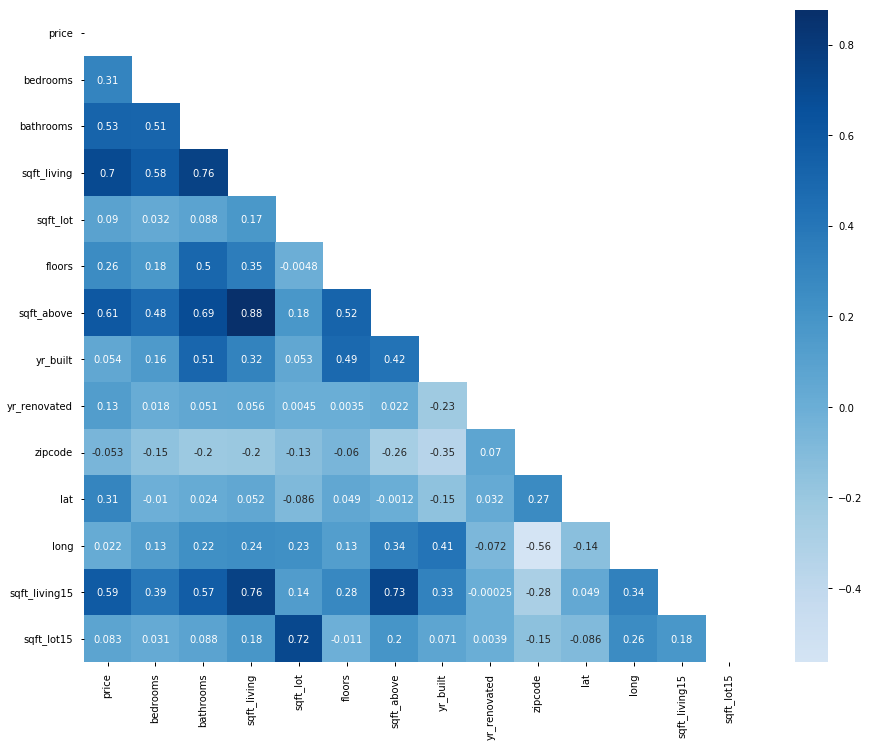

In [9]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), center=0, ax=ax, annot=True, mask=np.triu(np.ones_like(df.corr(), dtype=bool)), cmap="Blues");

We can see that some of the strongest correlations with price (over 0.5) are: number of bathrooms, sqft_living, sqft_above,sqft_living15 which tells us something about the area where the house is.

### Scatterplot
We can also generate a scatterplot that shows us the different variables plotted vs one another to reveal underlying correlations.

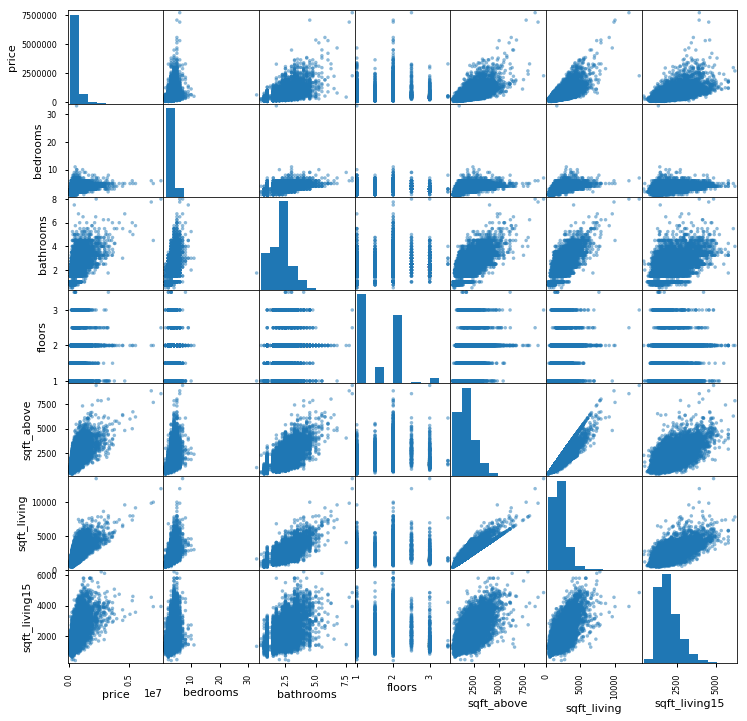

In [10]:
main=pd.DataFrame(df, columns = ['price',"bedrooms","bathrooms", "floors","sqft_above", "sqft_living","sqft_living15", "date"])
pd.plotting.scatter_matrix(main,figsize  = [12, 12]);

From this very first visualization we start to see some linear correlations and we can spot some outliers.
Number of bedrooms seems to have an outlier, and there seems to be some correlation of price with price of the houses, in particular with number of bathrooms, sqft_above, sqft_living and sqft_living 15.
Let us plot these out.

Text(0, 0.5, 'Price in USD')

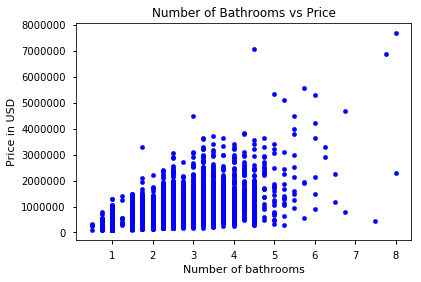

In [11]:
ax=df.plot.scatter(x='bathrooms',y='price',color='blue')
ax.set_title("Number of Bathrooms vs Price")
ax.set_xlabel("Number of bathrooms")
ax.set_ylabel("Price in USD")
#plt.plot(np.unique(df['bathrooms']), np.poly1d(np.polyfit(df['bathrooms'],\
#                    df['price'], 1))(np.unique(df['bathrooms'])), color='red');

Text(0, 0.5, 'Price in USD')

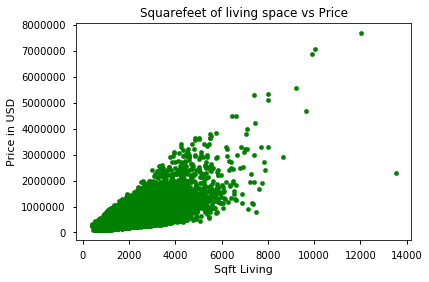

In [12]:
ax=df.plot.scatter(x='sqft_living',y='price',color='green')
ax.set_title("Squarefeet of living space vs Price")
ax.set_xlabel("Sqft Living")
ax.set_ylabel("Price in USD")
#plt.plot(np.unique(df['sqft_living']), np.poly1d(np.polyfit(df['sqft_living'],\
#                    df['price'], 1))(np.unique(df['sqft_living'])), color='red');

Text(0, 0.5, 'Price in USD')

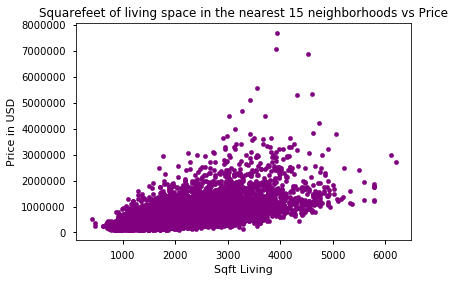

In [13]:
ax=df.plot.scatter(x='sqft_living15',y='price',color='purple')
ax.set_title("Squarefeet of living space in the nearest 15 neighborhoods vs Price")
ax.set_xlabel("Sqft Living")
ax.set_ylabel("Price in USD")
#plt.plot(np.unique(df['sqft_living15']), np.poly1d(np.polyfit(df['sqft_living15'],\
#                    df['price'], 1))(np.unique(df['sqft_living15'])), color='red');

### Correlation matrix
We are going to need this more in detail later but a correlation matrix can also give us a better sense of what are the correlations between the variables.

In [14]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


There are some interesting correlations here.
As we expected especially for number of bedrooms, bathrooms, living sqfootage and sqft above.
<br> To better study and understand these correlations we are going to do some data preparation, using one hot encoding and then running a linear regression model and then we will proceed to try to improve our model getting rid of outliers and studying the correlation coefficients.

## Clean the data <a id='Clean_the_Data'></a>
### Change formats
Some of the data is in the format 'object' and therefore cannot be included in the calculations. 
<br>In one case, basement sqft it is probably a matter of just changing the format, while other entries like condition and grade are string values that need to be translated into something numerical that our model can work with.
<br>Consequently we are going to use the method "One Hot Encoding" to change the format of the categorical variables to be able to include them in our calculation. 

In [15]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
274.0         1
2350.0        1
862.0         1
2580.0        1
2730.0        1
Name: sqft_basement, Length: 304, dtype: int64

Clearly most of the values are numerical, and can be easily turned into a numerical format, while we are going to change the value '?' into zero, as we are not aware of what is the square footage of the basement, it is safer to do this compared to assuming some other value for it.

In [16]:
df['sqft_basement'] = df['sqft_basement'].replace('?','0.0')

In [17]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [18]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

Some other columns are not numerical but can be converted. For example "grade" has actually a number representing it but because it is followed also by a string its format is object.
Let us take care of that.

In [20]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [21]:
# Creating a dictionary using which we will remap the values
dict = {'7 Average' : 7,'8 Good': 8,'9 Better':9,'6 Low Average':6,'10 Very Good':10,'11 Excellent':11,'5 Fair':5,\
        '12 Luxury':12,'4 Low':4,'13 Mansion':13 ,'3 Poor':3}
 
# Remap the values of the dataframe
df=df.replace({"grade": dict})

In [22]:
df['grade'] = df['grade'].astype(float)

Now let us explore the column 'condition'. Maybe we can also replace that easily with numerical values.

In [23]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

From the reference that has been given to us (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) it is clear that the values for condition are to be interepreted as follows:
Relative to age and grade. Coded 1-5.

1 = Poor<br>
2 = Fair<br>
3 = Average<br>
4 = Good<br>
5= Very Good

We will then translate those values in the same way

In [24]:
dict = {'Poor':1, 'Fair':2, 'Average': 3,'Good': 4,'Very Good':5}
 
# Remap the values of the dataframe
df=df.replace({"condition": dict})

In [25]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  float64
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

### Handling missing values

In [27]:
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As we can see the columns that have missing values are 'waterfront', 'view' and 'year renovated'.
There are clear reasons for some values to be missing as not all of the houses have a waterfront or information about the view,
and not all the houses were renovated. <br>We will use that information later and separately, but for now we are not going to include these variables in our model so there is not need to worry about them.

### Preliminary Regression Model

Running a linear regression here before one hot encoding. This is very early on and super preliminary but we can do this just to get a first sense.
<br>Because of the large amount of null values in waterfront and view I have to drop them, or my model won't work.

In [28]:
df.drop(['view', 'waterfront'], axis=1, inplace=True)

In [29]:
y=df['price']
X=df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [30]:
linreg.coef_

array([-4.66361524e+04,  4.74092519e+04,  1.25879803e+02,  1.51083013e-01,
        1.26493075e+04,  2.58884623e+04,  1.03112330e+05,  6.12191320e+01,
        5.48663289e+01, -3.06626448e+03, -4.84703935e+02,  5.50309302e+05,
       -2.48497782e+05,  3.80697831e+01, -3.21273794e-01])

In [31]:
linreg.intercept_

-3720645.3818795923

In [32]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.RED} The R squared value for this Preliminary Regression model is {Style.RESET_ALL}", R2) 

 The R squared value for this Preliminary Regression model is  0.6608796277809059


As a very preliminary regression model we got an R squared of 0.66. That means that our first draft model explain about 66% of the data. It is not terrible but there is definitely room for improvement.

Running the model in statsmodel to be able to see also the coefficients.

In [2]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

NameError: name 'sm' is not defined

Let us look at which ones are the variables which have the highest coefficients.

In [34]:
coefficients=model.params
sort_coef=coefficients.sort_values(ascending=False)
sort_coef[0:10]

lat              550309.302063
grade            103112.329822
bathrooms         47409.251943
condition         25888.462328
floors            12649.307510
sqft_living         125.879803
sqft_above           61.219132
sqft_basement        54.866329
sqft_living15        38.069783
sqft_lot              0.151083
dtype: float64

Latitude gives us a hint that there is a strong influence of the location of the house.
<br>But we will understand this better once we do some scaling and more in depth analysis.
The other factors that are most influential in determining the price of the house are the condition and grade, together with number of bathrooms, number of floors and squarefeet of living space.

In [1]:
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index[1:], orient='h')


NameError: name 'model' is not defined

### One Hot Encoding <a id='OHE'></a>

One Hot Encoding is a method that allows us to transform categorical variables into numerical ones to be able to better include them in our model.
<br>Some variables that can be considered categorical are the number of bedrooms and bathrooms and floors.
<br>So let us start from there.

In [36]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6.0,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,3,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,3,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,3,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,3,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


The numbers of bathrooms are not integers, but categorized in different ways whether there is a toilet or a sink or a shower etc.
This with one hot encoding would lead us to have A LOT of columns and also correlation will be more confusing to interpret. So to make this a little simpler I am going to round them up.

In [37]:
#Rounding up number of bathrooms

df['bathrooms']=df['bathrooms'].round(0)
df['bathrooms'].value_counts()

2.0    13847
1.0     3931
3.0     2527
4.0     1201
5.0       57
6.0       24
8.0        4
0.0        4
7.0        2
Name: bathrooms, dtype: int64

One Hot Encoding number of bathrooms, bedrooms and floors.

In [38]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['bedrooms', 'bathrooms', 'floors']

# Fit encoder on training set
ohe.fit(df[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
df_cat = pd.DataFrame(ohe.fit_transform(df[cat_columns]),
                           columns=new_cat_columns, index=df.index)

# Replace training columns with transformed versions
ohe_df = pd.concat([df.drop(cat_columns, axis=1), df_cat], axis=1)
ohe_df

,date,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,10/13/2014,221900.0,1180,5650,3,7.0,1180,0.0,1955,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,12/9/2014,538000.0,2570,7242,3,7.0,2170,400.0,1951,1991.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2/25/2015,180000.0,770,10000,3,6.0,770,0.0,1933,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,12/9/2014,604000.0,1960,5000,5,7.0,1050,910.0,1965,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2/18/2015,510000.0,1680,8080,3,8.0,1680,0.0,1987,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,1530,1131,3,8.0,1530,0.0,2009,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,2/23/2015,400000.0,2310,5813,3,8.0,2310,0.0,2014,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21594,6/23/2014,402101.0,1020,1350,3,7.0,1020,0.0,2009,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21595,1/16/2015,400000.0,1600,2388,3,8.0,1600,0.0,2004,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


So these are now our columns:

In [39]:
ohe_df.columns

Index(['date', 'price', 'sqft_living', 'sqft_lot', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bedrooms_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11',
       'bedrooms_33', 'bathrooms_0.0', 'bathrooms_1.0', 'bathrooms_2.0',
       'bathrooms_3.0', 'bathrooms_4.0', 'bathrooms_5.0', 'bathrooms_6.0',
       'bathrooms_7.0', 'bathrooms_8.0', 'floors_1.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5'],
      dtype='object')

## OHE Linear Regression Model <a id='OHELRM'></a>
We are ready now for our first linear regression model!
<br>Let us run it, and we are going to keep all the possible variables, with only the essential exceptions.
<br>We are going to be excluding view and waterfront, since they have a lot of missing values therefore they describe a small part of the data anyway. 
<br>The variables date and year renovated are numerical but because of their particular meaning I am going to treat them separately later on to do a more in depth analysis about them.

In [40]:
y=ohe_df['price']
X=ohe_df.drop(['price','date', 'yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [41]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.BLUE} The R squared value for this model done after One-Hot-Encoding is {Style.RESET_ALL}", R2) 

 The R squared value for this model done after One-Hot-Encoding is  0.6831990089433897


We see our R squared value already improving by 0.02 compared to the basic first regression.

Running the same model but with statsmodel to have more information

In [42]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1292.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:44:24   Log-Likelihood:            -2.9498e+05
No. Observations:               21597   AIC:                         5.900e+05
Df Residuals:                   21560   BIC:                         5.903e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     110.1687     18.585      5.928      0.000      73.740     146.598
sqft_lot          0.1330      0.049      2.698      0.007       0.036       0.230
condition      3.158e+04   2405.178     13.130      0.000    2.69e+04    3.63e+04
grade          1.068e+05   2233.594     47.814      0.000    1.02e+05    1.11e+05
sqft_above       50.1122     18.616      2.692      0.007      13.623      86.601
sqft_basement    58.0151     18.433      3.147      0.002      21.885      94.145
yr_built      -2670.9430     76.036    -35.127      0.000   -2819.980   -2521.906
zipcode        -513.2521     33.875    -15.151      0.000    -579.650    -446.854
lat            5.376e+05   1.11e+04     48.604      0.000    5.16e+05    5.59e+05
long          -2.171e+05   1.36e+04    -15.926      0.000   -2.44e+05    -1.9e+05
sqft_living15    56.6105      3.557     15.916      0.000      49.639      63.582
sqft_lot15       -0.3891      0.076     -5.153      0.000      -0.537      -0.241
bedrooms_1      9.34e+05   6.97e+05      1.340      0.180   -4.33e+05     2.3e+06
bedrooms_2     8.959e+05   6.97e+05      1.285      0.199   -4.71e+05    2.26e+06
bedrooms_3     8.504e+05   6.97e+05      1.220      0.222   -5.16e+05    2.22e+06
bedrooms_4     8.015e+05   6.97e+05      1.150      0.250   -5.64e+05    2.17e+06
bedrooms_5     7.926e+05   6.97e+05      1.138      0.255   -5.73e+05    2.16e+06
bedrooms_6     7.378e+05   6.97e+05      1.059      0.290   -6.28e+05     2.1e+06
bedrooms_7     5.632e+05   6.97e+05      0.808      0.419   -8.04e+05    1.93e+06
bedrooms_8     7.919e+05   6.98e+05      1.134      0.257   -5.77e+05    2.16e+06
bedrooms_9     2.481e+05   7.01e+05      0.354      0.723   -1.13e+06    1.62e+06
bedrooms_10    5.642e+05   7.04e+05      0.801      0.423   -8.16e+05    1.94e+06
bedrooms_11    5.936e+05   7.22e+05      0.822      0.411   -8.22e+05    2.01e+06
bedrooms_33    9.474e+05   7.24e+05      1.309      0.191   -4.71e+05    2.37e+06
bathrooms_0.0  3.794e+05   9.34e+05      0.406      0.685   -1.45e+06    2.21e+06
bathrooms_1.0  4.563e+05   9.28e+05      0.491      0.623   -1.36e+06    2.28e+06
bathrooms_2.0  4.332e+05   9.28e+05      0.467      0.641   -1.39e+06    2.25e+06
bathrooms_3.0  4.719e+05   9.28e+05      0.508      0.611   -1.35e+06    2.29e+06
bathrooms_4.0  5.703e+05   9.29e+05      0.614      0.539   -1.25e+06    2.39e+06
bathrooms_5.0  1.011e+06   9.29e+05      1.088      0.276   -8.09e+05    2.83e+06
bathrooms_6.0  1.399e+06   9.29e+05      1.505      0.132   -4.23e+05    3.22e+06
bathrooms_7.0  1.301e+06   9.38e+05      1.387      0.165   -5.37e+05    3.14e+06
bathrooms_8.0  2.699e+06   9.35e+05      2.888      0.004    8.67e+05    4.53e+06
floors_1.0     1.375e+06   1.39e+06      0.988      0.323   -1.35e+06     4.1e+06
floors_1.5     1.384e+06   1.39e+06      0.995   

Before doing a train-test split and cross validation for our model, let's try to improve the model increasing the R squared and once we have the best one we will run the cross validation too.

## Trying to improve my model <a id='impr'></a> # assumptions of linear regression
We are going now to take several different steps to try to improve this first linear regression model.
<br>We already took care of the categorical variables with one hot encoding.
<br>Now it is time to work on the continuous ones, and we will first normalize them and then scale them, whenever necessary, to satify the normality assumption for running this type of model.

### Transforming the variables, normalizing and scaling them
The easiest way to see if a variable is normally distributed is by plotting histograms.

The continuous variables on which I chose to focus on so far are: sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, sqftliving_15 and sqft_lot_15.

In [43]:
cols=['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15']

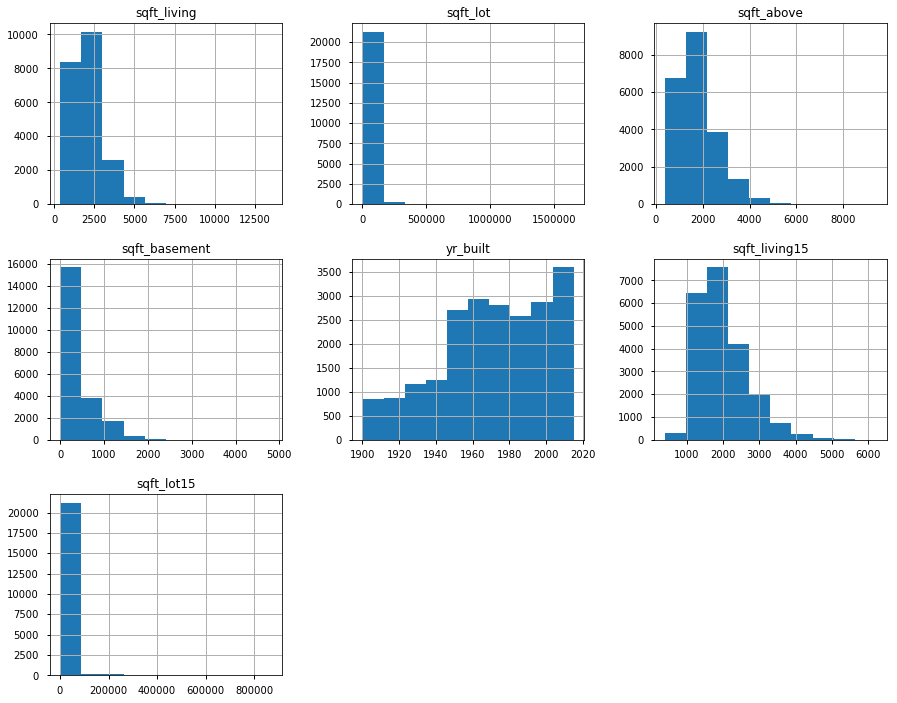

In [44]:
df[cols].hist(figsize  = [15,12]); 

From what I can observe, squarefoot living, sqft above and sqft living 15 could probably beneficiate from logarythmic normalization.
<br>Sqft basement, Sqft lot and Sqft lot15 are also not following a normal distribution but they seem to be zero-inflated variables which is complicated to work with, so we might just leave them as they are.

In [45]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

As expected, there are a lot of zeros for these variables.
<br>It was probably classified this way when there is simply no basement in the house. 
<br>But I also don't want to drop all the columns with no basement, since 13280 is a consistent number and I don't want to lose all of that information.
<br>I will leave it as is for now and select the features which don't have this characteristic.

### Outliers <a id='Out'></a>
I want to inspect the bedroom variable since we spotted a possible outlier before, and then we will move on to transformation and scaling.

In [46]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Yes, 33 seems like a typo so we will just remove that.

In [47]:
df.drop(df.loc[df['bedrooms']==33].index, inplace=True) #let's remove it from our original data frame
ohe_df.drop('bedrooms_33', axis=1, inplace=True)# and also form the one hot encoding one

In [48]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

Let us also try to drop the outliers for the sale price.
Instead of dropping the outliers for every single feature, which would be time consuming and lead us to discard a big chunk of the data, this seems like a reasonable solution.

In [49]:
"""Removing outliers in the main database """
Q95=np.percentile(df['price'],95)
Q5=np.percentile(df['price'],5)
df.drop(df.index[df['price']>Q95], inplace=True)
df.drop(df.index[df['price']<Q5], inplace=True)

In [50]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.0,1180,5650,1.0,3,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.0,2570,7242,2.0,3,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,12/9/2014,604000.0,4,3.0,1960,5000,1.0,5,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.0,1680,8080,1.0,3,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,6/27/2014,257500.0,3,2.0,1715,6819,2.0,3,7.0,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.0,1530,1131,3.0,3,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.0,2310,5813,2.0,3,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,1.0,1020,1350,2.0,3,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.0,1600,2388,2.0,3,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Transformations <a id='Trans'></a>

A simple way to normalize a variable is by transforming it, taking the logarythm of its value, since the log is a monotonically icreasing function this is not going to change the overall trend of our variable but is going to help us satisfy the requirements for the model, to have normally distributed variables.
<br>We just need to remember when we are trying to draw some conclusions about these variables, that now we are working with the logarythm and not the original value itself.

In [51]:
df_log=pd.DataFrame()
non_normal = ['sqft_living', 'sqft_above', 'sqft_living15']
for feat in non_normal:
    df_log[feat] = df[feat].map(lambda x: np.log(x))
df_log = df_log.add_suffix('_log')

In [52]:
df_log

,sqft_living_log,sqft_above_log,sqft_living15_log
0,7.073270,7.073270,7.200425
1,7.851661,7.682482,7.432484
3,7.580700,6.956545,7.215240
4,7.426549,7.426549,7.495542
6,7.447168,7.447168,7.713338
...,...,...,...
21592,7.333023,7.333023,7.333023
21593,7.745003,7.745003,7.512071
21594,6.927558,6.927558,6.927558
21595,7.377759,7.377759,7.251345


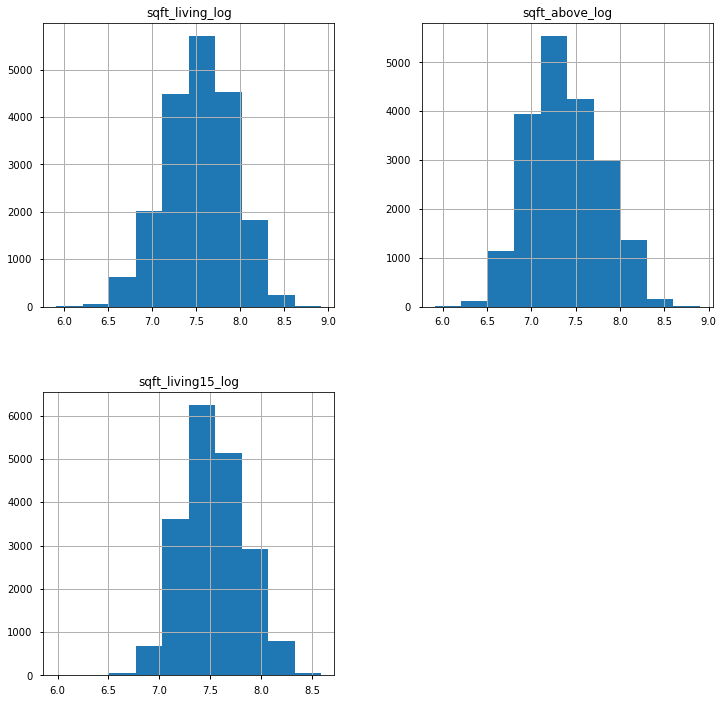

In [53]:
df_log.hist(figsize  = [12,12]); 

The values are a little more normal now. 

## Scaling <a id='Scale'></a>

The process of scaling helps us putting all the different variables on the same scale, so that they can be compared in a more equal way when considering the coefficients.
<br>There are several way of scaling and I am not certain whether min-max scaling or normalization is a better option.<br>I am going to try to transform all the variables with one and then the other, and see which one brins the better results.

### Min Max Scaling

In the min max scaling each value gets the min subtracted and is divided by the difference between the max and the min of that variable.
In this way all the values fall between 0 and 1.

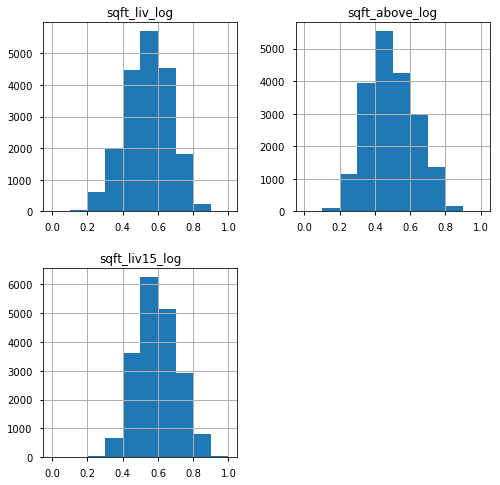

In [54]:
### Before this code block add the formula of the min max scaler in formula version
sqll = df_log['sqft_living_log']
sqal  = df_log['sqft_above_log']
sq1v15 = df_log['sqft_living15_log']

scaled_sqll = (sqll - min(sqll)) / (max(sqll) - min(sqll))
scaled_sqal = (sqal - min(sqal)) / (max(sqal) - min(sqal))
scaled_sq1v15 = (sq1v15 - min(sq1v15)) / (max(sq1v15) - min(sq1v15))

data_cont_mmscaled = pd.DataFrame([])
data_cont_mmscaled['sqft_liv_log'] = scaled_sqll
data_cont_mmscaled['sqft_above_log'] = scaled_sqal
data_cont_mmscaled['sqft_liv15_log'] = scaled_sq1v15

data_cont_mmscaled.hist(figsize = [8,8]);

In [55]:
mmscaled_df=pd.concat([ohe_df,data_cont_mmscaled], axis=1)

In [56]:
mmscaled_df.head()

,date,price,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_liv_log,sqft_above_log,sqft_liv15_log
0,10/13/2014,221900.0,1180,5650,3,7.0,1180,0.0,1955,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.385755,0.388549,0.465682
1,12/9/2014,538000.0,2570,7242,3,7.0,2170,400.0,1951,1991.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.644659,0.592650,0.554885
2,2/25/2015,180000.0,770,10000,3,6.0,770,0.0,1933,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,12/9/2014,604000.0,1960,5000,5,7.0,1050,910.0,1965,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.554534,0.349444,0.471377
4,2/18/2015,510000.0,1680,8080,3,8.0,1680,0.0,1987,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.503261,0.506906,0.579124


At this point I can drop the columns that I transformed and scaled

In [57]:
mmscaled_df.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)
mmscaled_df = mmscaled_df.dropna() # dropping null values that will given trouble in the fit

In [58]:
mmscaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16057 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            16057 non-null  object 
 1   price           16057 non-null  float64
 2   sqft_lot        16057 non-null  int64  
 3   condition       16057 non-null  int64  
 4   grade           16057 non-null  float64
 5   sqft_basement   16057 non-null  float64
 6   yr_built        16057 non-null  int64  
 7   yr_renovated    16057 non-null  float64
 8   zipcode         16057 non-null  int64  
 9   lat             16057 non-null  float64
 10  long            16057 non-null  float64
 11  sqft_lot15      16057 non-null  int64  
 12  bedrooms_1      16057 non-null  float64
 13  bedrooms_2      16057 non-null  float64
 14  bedrooms_3      16057 non-null  float64
 15  bedrooms_4      16057 non-null  float64
 16  bedrooms_5      16057 non-null  float64
 17  bedrooms_6      16057 non-null 

### Normalizing instead of min max scaling

This time nstead of using the MinMax scaler I am going to use a normalizer, which substracts the mean from the value and divides by the standard deviation.
The features scaled this way are centered around zero and have a standard deviation of 1.

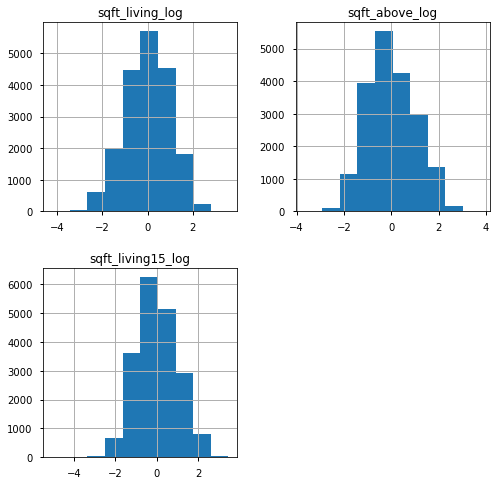

In [59]:
### Before this block, write out the formula, in formula format, of the normal scaler
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_cont_norm = df_log.apply(normalize)
data_cont_norm.hist(figsize  = [8, 8]);

In [60]:
norm_df=pd.concat([ohe_df,data_cont_norm], axis=1)

In [61]:
norm_df.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)
norm_df = norm_df.dropna()

In [62]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16057 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               16057 non-null  object 
 1   price              16057 non-null  float64
 2   sqft_lot           16057 non-null  int64  
 3   condition          16057 non-null  int64  
 4   grade              16057 non-null  float64
 5   sqft_basement      16057 non-null  float64
 6   yr_built           16057 non-null  int64  
 7   yr_renovated       16057 non-null  float64
 8   zipcode            16057 non-null  int64  
 9   lat                16057 non-null  float64
 10  long               16057 non-null  float64
 11  sqft_lot15         16057 non-null  int64  
 12  bedrooms_1         16057 non-null  float64
 13  bedrooms_2         16057 non-null  float64
 14  bedrooms_3         16057 non-null  float64
 15  bedrooms_4         16057 non-null  float64
 16  bedrooms_5         160

## MinMax Scaler Linear Regression <a id='MMLRM'></a>
Let us try a linear regression with the Min Max scaling, and then I will do it again with the normal scaling and we can compare the results.

In [63]:
y=mmscaled_df['price']
X=mmscaled_df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)
LinearRegression()

LinearRegression()

In [64]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.MAGENTA}The R squared value for this model scaled with MinMaxScaling is \
{Style.RESET_ALL}", R2) 

The R squared value for this model scaled with MinMaxScaling is  0.6609871645016018


## Normal Scaler Linear Regression <a id='NLRM'></a>

In [65]:
y=norm_df['price']
X=norm_df.drop(['price', 'date', 'yr_renovated'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [66]:
R2=metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.GREEN}The R squared value for this model scaled with Normal Scaler is \
{Style.RESET_ALL}", R2) 

The R squared value for this model scaled with Normal Scaler is  0.6609871645016014


How interesting! The two different scaling give us a very similar R squared value, almost exactly the same!
<br>Also R squared has not really improved, it has actually slightly decreased from the scaling and normalization.
<br>We didn't expect the transformations to increase considerably the model performance, but it was still important to do them to be able to run a linear regression model fulfilling all the assumptions.
<br>But there is still more improving that we can do for the model!

Next we need to check for multicollinearity and try to drop the variables that have p>0.05.

## Multicollinearity <a id='Multi'></a>

Multicollinearity is when the assumptions that all the variables are independent is NOT fulfilled, which can cause problems because if one variable is strictly dependent on another then the model interpretation becomes hard.
<br>This is so because in general we want to be able to tell which one of the specific variables is influencing the target in which specific way, but if two variables influence also each other it is hard to interpret that.
<br>Multicollinearity is also a direct consequence of One-Hot-Encoding, but we can fix that by dropping one variable for each category that we splitted with OHE.

In [67]:
norm_df.corr().head()

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_living_log,sqft_above_log,sqft_living15_log
price,1.000000,0.093164,0.032698,0.611630,0.213646,0.023411,0.091812,-0.025568,0.389406,0.070229,...,-0.001764,-0.262295,0.056297,0.223955,0.054938,0.011513,0.000486,0.569466,0.488399,0.521864
sqft_lot,0.093164,1.000000,0.000768,0.096755,0.016532,0.042459,0.007583,-0.135221,-0.108603,0.230025,...,-0.001644,0.000964,0.013215,0.009123,0.005717,-0.054350,-0.005916,0.143631,0.151632,0.146749
condition,0.032698,0.000768,1.000000,-0.187875,0.175993,-0.378006,-0.063469,0.016885,-0.008227,-0.118412,...,-0.005007,0.233333,0.150668,-0.290516,-0.017856,-0.100770,-0.011197,-0.071814,-0.181316,-0.116156
grade,0.611630,0.096755,-0.187875,1.000000,0.049647,0.477778,-0.020651,-0.199790,0.036164,0.247849,...,-0.004682,-0.406653,-0.141534,0.467911,0.054328,0.070840,0.006827,0.679951,0.695058,0.643467
sqft_basement,0.213646,0.016532,0.175993,0.049647,1.000000,-0.163938,0.042148,0.093193,0.076137,-0.154167,...,-0.005220,0.314160,-0.018706,-0.275948,-0.011689,-0.097871,-0.011674,0.363148,-0.166938,0.122163


This matrix is hard to interpret with so many variables but I am going to filter only the correlations that are above 0.75, which are considered strong correlations.

In [68]:
corr_matr=abs(norm_df.corr()) > 0.75
corr_matr.head()

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_living_log,sqft_above_log,sqft_living15_log
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Creating a dataframe with this information

In [69]:
df_cc=norm_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

# set index to pairs
df_cc.set_index(['pairs'], inplace = True)

#drop level columns
df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_cc.columns = ['cc']

In [70]:
df_cc.drop_duplicates(inplace=True)
df_cc[(df_cc.cc>.75) & (df_cc.cc <1)]

,cc
pairs,
"(sqft_above_log, sqft_living_log)",0.83786
"(floors_1.0, floors_2.0)",0.77745


# Modify here

It looks like squarefoot living and squarefoot above are strongly correlated and that makes sense.
<br> Also squarefoot living and squarefoot living 15 are correlated so I will drop squarefoot living since it is in both high correlations.
<br>1 floor and 2 floors are too, as we know from one hot encoding when we are supposed to drop the first column to avoid multicollineairty. I will drop one column for each categorical value in the following LRM.
<br>But first we are going to check the ohe linear model we previously ran, but doing it with statsmodel to see the coefficients, so to drop the ones that have p>0.05

## P values, F-statistic <a id='PF'></a>

Same model that we ran right after normalization, doing it with statsmodel to see the coefficients.

In [71]:
norm_df.drop('date', axis=1, inplace=True)

In [72]:
y=norm_df['price']
X=norm_df.drop(['price', 'yr_renovated'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     918.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:44:29   Log-Likelihood:            -2.1053e+05
No. Observations:               16057   AIC:                         4.211e+05
Df Residuals:                   16022   BIC:                         4.214e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.281e+06   1.51e+06     -4.808      0.000   -1.02e+07   -4.31e+06
sqft_lot              0.2429      0.034      7.222      0.000       0.177       0.309
condition          2.335e+04   1641.365     14.224      0.000    2.01e+04    2.66e+04
grade              8.125e+04   1510.598     53.786      0.000    7.83e+04    8.42e+04
sqft_basement        36.0243      6.787      5.308      0.000      22.722      49.327
yr_built          -1970.3933     52.556    -37.492      0.000   -2073.408   -1867.378
zipcode            -162.7267     23.456     -6.937      0.000    -208.703    -116.750
lat                5.135e+05   7395.891     69.430      0.000    4.99e+05    5.28e+05
long               -4.31e+04   9189.560     -4.690      0.000   -6.11e+04   -2.51e+04
sqft_lot15           -0.1091      0.051     -2.139      0.032      -0.209      -0.009
bedrooms_1        -5.988e+05   1.39e+05     -4.305      0.000   -8.71e+05   -3.26e+05
bedrooms_2        -6.231e+05   1.39e+05     -4.486      0.000   -8.95e+05   -3.51e+05
bedrooms_3        -6.605e+05   1.39e+05     -4.765      0.000   -9.32e+05   -3.89e+05
bedrooms_4        -6.667e+05   1.39e+05     -4.810      0.000   -9.38e+05   -3.95e+05
bedrooms_5        -6.787e+05   1.39e+05     -4.896      0.000    -9.5e+05   -4.07e+05
bedrooms_6         -6.82e+05   1.39e+05     -4.917      0.000   -9.54e+05    -4.1e+05
bedrooms_7        -7.026e+05   1.41e+05     -4.989      0.000   -9.79e+05   -4.27e+05
bedrooms_8        -6.789e+05   1.44e+05     -4.700      0.000   -9.62e+05   -3.96e+05
bedrooms_9        -6.724e+05   1.51e+05     -4.439      0.000   -9.69e+05   -3.76e+05
bedrooms_10       -5.523e+05   1.52e+05     -3.640      0.000    -8.5e+05   -2.55e+05
bedrooms_11       -7.647e+05   1.76e+05     -4.346      0.000   -1.11e+06    -4.2e+05
bathrooms_0.0     -1.019e+06   2.04e+05     -4.988      0.000   -1.42e+06   -6.18e+05
bathrooms_1.0      -8.93e+05    1.9e+05     -4.695      0.000   -1.27e+06    -5.2e+05
bathrooms_2.0      -8.92e+05    1.9e+05     -4.693      0.000   -1.26e+06   -5.19e+05
bathrooms_3.0     -8.556e+05    1.9e+05     -4.498      0.000   -1.23e+06   -4.83e+05
bathrooms_4.0     -8.064e+05    1.9e+05     -4.234      0.000   -1.18e+06   -4.33e+05
bathrooms_5.0     -8.377e+05   1.92e+05     -4.367      0.000   -1.21e+06   -4.62e+05
bathrooms_6.0     -1.069e+06   2.05e+05     -5.216      0.000   -1.47e+06   -6.67e+05
bathrooms_7.0     -9.562e-10   2.11e-10     -4.540      0.000   -1.37e-09   -5.43e-10
bathrooms_8.0     -9.086e+05   2.28e+05     -3.992      0.000   -1.35e+06   -4.62e+05
floors_1.0        -1.253e+06   2.52e+05     -4.972      0.000   -1.75e+06   -7.59e+05
floors_1.5        -1.234e+06   2.52e+05     -4.893      0.000   -1.73e+06    -7.4e+05
floors_2.0        -1.219e+06   2.52e+05     -4.832      0.000   -1.71e+06

Beside all the categorical values from one hot encoding, none of the other variables have p>0.05.
So le us run another linear regression model dropping a column for each categorical variable, and squarefoot living.

## P-values Linear Regression Model <a id='PFLRM'></a>

In [73]:
y=norm_df['price']
X=norm_df.drop(['price', 'yr_renovated', 'bedrooms_1','bathrooms_1.0','floors_1.0','sqft_living_log'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     943.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:44:29   Log-Likelihood:            -2.1055e+05
No. Observations:               16057   AIC:                         4.212e+05
Df Residuals:                   16023   BIC:                         4.214e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.094e+07   2.09e+06     -5.234      0.000    -1.5e+07   -6.84e+06
sqft_lot              0.2430      0.034      7.218      0.000       0.177       0.309
condition          2.342e+04   1643.083     14.255      0.000    2.02e+04    2.66e+04
grade              8.181e+04   1509.251     54.208      0.000    7.89e+04    8.48e+04
sqft_basement        72.0932      3.077     23.432      0.000      66.063      78.124
yr_built          -1980.5793     52.584    -37.665      0.000   -2083.651   -1877.508
zipcode            -153.7007     23.432     -6.559      0.000    -199.631    -107.770
lat                5.137e+05   7403.759     69.387      0.000    4.99e+05    5.28e+05
long              -4.317e+04   9199.450     -4.692      0.000   -6.12e+04   -2.51e+04
sqft_lot15           -0.1090      0.051     -2.135      0.033      -0.209      -0.009
bedrooms_2        -2.004e+04   1.12e+04     -1.793      0.073    -4.2e+04    1868.482
bedrooms_3        -5.529e+04   1.12e+04     -4.945      0.000   -7.72e+04   -3.34e+04
bedrooms_4        -5.951e+04   1.14e+04     -5.205      0.000   -8.19e+04   -3.71e+04
bedrooms_5         -7.18e+04    1.2e+04     -5.970      0.000   -9.54e+04   -4.82e+04
bedrooms_6        -7.507e+04   1.44e+04     -5.204      0.000   -1.03e+05   -4.68e+04
bedrooms_7        -9.258e+04   3.04e+04     -3.049      0.002   -1.52e+05   -3.31e+04
bedrooms_8         -7.62e+04   4.71e+04     -1.616      0.106   -1.69e+05    1.62e+04
bedrooms_9        -7.224e+04   7.05e+04     -1.025      0.306    -2.1e+05     6.6e+04
bedrooms_10        4.569e+04    7.1e+04      0.643      0.520   -9.36e+04    1.85e+05
bedrooms_11       -1.593e+05   1.21e+05     -1.321      0.187   -3.96e+05    7.71e+04
bathrooms_0.0      -1.02e+05    8.5e+04     -1.200      0.230   -2.69e+05    6.46e+04
bathrooms_2.0      6106.3792   3333.214      1.832      0.067    -427.094    1.26e+04
bathrooms_3.0      4.225e+04   4752.387      8.890      0.000    3.29e+04    5.16e+04
bathrooms_4.0      8.984e+04   6532.049     13.753      0.000     7.7e+04    1.03e+05
bathrooms_5.0      5.578e+04   3.11e+04      1.795      0.073   -5130.448    1.17e+05
bathrooms_6.0     -1.834e+05   8.62e+04     -2.127      0.033   -3.52e+05   -1.44e+04
bathrooms_7.0      6.328e-09   7.92e-08      0.080      0.936   -1.49e-07    1.61e-07
bathrooms_8.0      6306.1015   1.39e+05      0.045      0.964   -2.66e+05    2.78e+05
floors_1.5         1.799e+04   3807.181      4.725      0.000    1.05e+04    2.55e+04
floors_2.0         3.351e+04   2971.551     11.277      0.000    2.77e+04    3.93e+04
floors_2.5          5.79e+04   1.32e+04      4.398      0.000    3.21e+04    8.37e+04
floors_3.0         6.623e+04   6622.140     10.001      0.000    5.32e+04    7.92e+04
floors_3.5         5.401e+04   5.38e+04      1.004      0.315   -5.14e+04

With this linear model R is still around 6.66 but more values with high p have emerged, specifically 'bedrooms_8', 'bedrooms_11','bathrooms_0.0', 'bathrooms_3.0' and 'floors_1.5' all have p-value>0.05.
<br> These are probably false positives for p, given the high number of variables we are dealing with.

Doing all of these things has not been helpful to increase the R-squared value.
<br>Normalizing and scaling is not supposed to increase it, we do it only for our model to fit within the criteria of normality.
<br>We also want to avoid multicollinearity if we want our coefficients from our model to be reliable and to help us give a better interpretation of the relationship between the variables.
<br>Now that we took care of all this, it is time to do some feature engineering to see what other types of variables that are present in the data we have could help us improve our model.

## Feature Engineering <a id='FE'></a>

Feature engineering is about finding new features that we can incorporate in our model and that can improve the way it describes and fits the data. <br>We are going to look at three features that are already provided (renovations, zipcode and time of sale) but we are going to manipulate them so that they can tell us something more and the information that they carry can be better interpreted by the model.
<br>Then after that we are going to try an unusual way to find other features that can help our model too.

### Renovations <a id='Reno'></a>

Let us explore the information that we have about houses that were renovated.
Since these houses were already a small number to begin with, in this case I am going to take again the original database without the removal of the outliers, to have as much data as possible.

In [74]:
df_orig=pd.read_csv('Data/kc_house_data.csv')

In [75]:
df_orig.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [76]:
df_orig['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [77]:
df_orig['yr_renovated'].isna().sum()

3842

In [78]:
df_orig['yr_renovated'] = df_orig['yr_renovated'].fillna(0)

Let us create a dataframe with only houses that were renovated so we can study them better

In [79]:
reno=pd.DataFrame()
reno=df_orig.loc[df_orig['yr_renovated']!=0]

In [80]:
reno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,NO,NONE,...,8 Good,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,NO,NONE,...,7 Average,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,NO,NONE,...,8 Good,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,NO,NONE,...,8 Good,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19602,6392000625,7/12/2014,451000.0,2,1.00,900,6000,1.0,NO,NONE,...,7 Average,900,0.0,1944,2004.0,98115,47.6855,-122.289,1460,4800
20041,126039256,9/4/2014,434900.0,3,2.00,1520,5040,2.0,NO,NONE,...,7 Average,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,4305600360,2/25/2015,500012.0,4,2.50,2400,9612,1.0,NO,NONE,...,8 Good,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539
20431,3319500628,2/12/2015,356999.0,3,1.50,1010,1546,2.0,NaN,NONE,...,8 Good,1010,0.0,1971,2014.0,98144,47.5998,-122.311,1010,1517


Ok so the houses that have actually been renovated are only 744. Let us run some statistics on them.

In [81]:
reno.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7.440000e+02,7.440000e+02,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,4.418716e+09,7.689019e+05,3.459677,2.306116,2327.377688,16215.530914,1.504704,1878.719086,1939.455645,1995.928763,98095.623656,47.580564,-122.262043,1988.877688,13390.768817
std,2.908265e+09,6.271258e+05,1.068823,0.898233,1089.002040,38235.308760,0.493202,849.441413,22.088850,15.599946,54.861316,0.120855,0.129586,715.440144,26213.648057
min,3.600057e+06,1.100000e+05,1.000000,0.750000,520.000000,1024.000000,1.000000,520.000000,1900.000000,1934.000000,98001.000000,47.196000,-122.497000,828.000000,1281.000000
25%,1.922985e+09,4.122500e+05,3.000000,1.750000,1560.000000,5000.000000,1.000000,1267.500000,1921.000000,1987.000000,98040.000000,47.523350,-122.358000,1460.000000,5000.000000
50%,3.899100e+09,6.075020e+05,3.000000,2.250000,2200.000000,7375.000000,1.500000,1730.000000,1941.500000,2000.000000,98112.000000,47.602800,-122.292000,1850.000000,7455.000000
75%,7.014200e+09,9.000000e+05,4.000000,2.750000,2872.500000,12670.750000,2.000000,2300.000000,1955.000000,2007.250000,98126.000000,47.670950,-122.210000,2380.000000,10925.750000
max,9.829200e+09,7.700000e+06,11.000000,8.000000,12050.000000,478288.000000,3.000000,8570.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.359000,5500.000000,310582.000000


This is already giving us a lot of information.
<br>The houses that have been renovated have on average <span style="color:blue">3.46 bedrooms, 2.3 bathrooms, 2327 squarefeet</span> of living space.
These houses were on average built in 1939 and renovated around 1996 and sold on average for<span style="color:blue"> 769 thousand dollars</span>.

Let us take a look at some information from the general database of houses that were NOT renovated.

In [82]:
noren=pd.DataFrame()
noren=df_orig.loc[df_orig['yr_renovated']==0]

In [83]:
noren.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.085300e+04,2.085300e+04,20853.000000,20853.000000,20853.000000,2.085300e+04,20853.000000,20853.000000,20853.000000,20853.0,20853.000000,20853.000000,20853.000000,20853.000000,20853.000000
mean,4.586246e+09,5.321403e+05,3.370115,2.109037,2071.507313,1.505959e+04,1.493718,1785.381432,1972.125114,0.0,98077.321345,47.559363,-122.212268,1986.539778,12735.717499
std,2.875507e+09,3.518947e+05,0.920686,0.763118,910.209733,4.152180e+04,0.541274,826.815098,28.974784,0.0,53.357658,0.139088,0.140805,684.145745,27311.862519
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.0,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125059e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.050000e+03,1.000000,1190.000000,1953.000000,0.0,98032.000000,47.468600,-122.327000,1490.000000,5100.000000
50%,3.904931e+09,4.490000e+05,3.000000,2.250000,1900.000000,7.620000e+03,1.500000,1560.000000,1976.000000,0.0,98065.000000,47.570600,-122.227000,1840.000000,7622.000000
75%,7.326200e+09,6.350000e+05,4.000000,2.500000,2540.000000,1.062600e+04,2.000000,2210.000000,1998.000000,0.0,98117.000000,47.678300,-122.123000,2360.000000,10061.000000
max,9.900000e+09,6.890000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,0.0,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The houses that have not been renovated have on average <span style="color:green">3.37 bedrooms, 2.1 bathrooms, 2072 squarefeet</span> of living space.
These houses were on average built in 1972 and sold on average for<span style="color:green"> $532,140</span>.

We can already see a considerable difference, considering that the number of bedrooms and bathrooms is similar, the lot size is not that close but comparable, and the price difference is around <span style="color:orange">$230,000</span>.

But we can do this in a more precise way to get a more accurate sense of the difference. <br>We are going to scout in the non renovated DataFrame for houses exactly in the range of the renovated houses, take a sample from there and calculate the average values for even more accurate figures.

In [84]:
filtered_values=pd.DataFrame()
filtered_values = noren.loc[((noren['bedrooms']>=3) & (noren['bedrooms']<=4) & (noren['bathrooms']<=3) & \
                             (noren['bathrooms']>=2) & (noren['sqft_living']>2000) & (noren['sqft_living']<=2700))]

In [85]:
filtered_values.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.665000e+03,3.665000e+03,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000,3665.0,3665.000000,3665.000000,3665.000000,3665.000000,3665.000000
mean,4.710393e+09,5.379679e+05,3.586357,2.453615,2325.689495,15680.863302,1.652251,2032.744884,1981.999181,0.0,98062.865757,47.544849,-122.174695,2202.994543,13817.261664
std,2.895765e+09,2.072246e+05,0.492553,0.229057,198.732436,35649.527682,0.479248,455.553159,24.379891,0.0,48.037314,0.146548,0.138264,436.776971,27372.714777
min,3.600072e+06,1.942500e+05,3.000000,2.000000,2005.000000,1159.000000,1.000000,810.000000,1900.000000,0.0,98001.000000,47.162200,-122.519000,399.000000,1062.000000
25%,2.206700e+09,3.760000e+05,3.000000,2.250000,2150.000000,5400.000000,1.000000,1620.000000,1970.000000,0.0,98029.000000,47.423000,-122.287000,1940.000000,5441.000000
50%,4.027700e+09,5.100000e+05,4.000000,2.500000,2310.000000,7857.000000,2.000000,2130.000000,1987.000000,0.0,98052.000000,47.559800,-122.175000,2220.000000,7852.000000
75%,7.524951e+09,6.499500e+05,4.000000,2.500000,2490.000000,11100.000000,2.000000,2400.000000,2001.000000,0.0,98092.000000,47.672600,-122.080000,2480.000000,10250.000000
max,9.839301e+09,1.950000e+06,4.000000,3.000000,2700.000000,715690.000000,3.000000,2700.000000,2015.000000,0.0,98199.000000,47.777500,-121.405000,4220.000000,560617.000000


In this way we obtained values even closer to the ones for the renovated houses.
<br>For a house that was not renovated, that has on average 3.5 bedrooms, 2.4 bathrooms and 2325 squarefeet of living space, the average selling price is <br><span style="color:green"> 538 thousand dollars</span>. 
<br>So given the same characteristics on average for a house that was renovated and one that wasn't, the house that was renovated got sold for roughly on average <span style="color:red"> $230 thousand more</span>.

In [86]:
reno.insert(1, 'reno', 1)
filtered_values.insert(1,'reno',0)

In [87]:
filtered_values

,id,reno,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
24,3814700200,0,11/20/2014,329000.0,3,2.25,2450,6500,2.0,NO,...,8 Good,2450,0.0,1985,0.0,98030,47.3739,-122.172,2200,6865
29,1873100390,0,3/2/2015,719000.0,4,2.50,2570,7173,2.0,NO,...,8 Good,2570,0.0,2005,0.0,98052,47.7073,-122.110,2630,6026
30,8562750320,0,11/10/2014,580500.0,3,2.50,2320,3980,2.0,NO,...,8 Good,2320,0.0,2003,0.0,98027,47.5391,-122.070,2580,3980
34,7955080270,0,12/3/2014,322500.0,4,2.75,2060,6659,1.0,NO,...,7 Average,1280,780.0,1981,0.0,98058,47.4276,-122.157,2020,8720
37,2768000400,0,12/30/2014,640000.0,4,2.00,2360,6000,2.0,NO,...,8 Good,2360,0.0,1904,0.0,98107,47.6702,-122.362,1730,4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,7570050450,0,9/10/2014,347500.0,3,2.50,2540,4760,2.0,NO,...,8 Good,2540,0.0,2010,0.0,98038,47.3452,-122.022,2540,4571
21578,5087900040,0,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,...,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21587,7852140040,0,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21589,3448900210,0,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023


Creating one database with the houses of comparable characteristic, where some of them renovated and some of them not.

In [88]:
compar=pd.concat([reno,filtered_values], axis=0)

In [89]:
compar

,id,reno,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,1,6/13/2014,696000.0,3,2.50,2300,3060,1.5,NO,...,8 Good,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
95,1483300570,1,9/8/2014,905000.0,4,2.50,3300,10250,1.0,NO,...,7 Average,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
103,2450000295,1,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,NO,...,8 Good,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113
125,4389200955,1,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,NO,...,8 Good,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,7570050450,0,9/10/2014,347500.0,3,2.50,2540,4760,2.0,NO,...,8 Good,2540,0.0,2010,0.0,98038,47.3452,-122.022,2540,4571
21578,5087900040,0,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,...,8 Good,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21587,7852140040,0,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21589,3448900210,0,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023


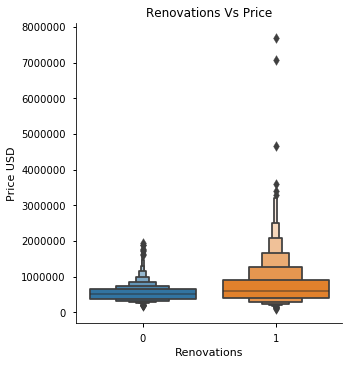

In [90]:
ax=sns.catplot(data=compar, x="reno", y="price", kind="boxen")
ax.set(ylabel="Price USD",
       xlabel="Renovations", title='Renovations Vs Price');

This gives us a sense also visually of how valuable it is to renovate a house vs not.

In [91]:
#sns.scatterplot(data=compar,x=df['zipcode'], y=df['price'],hue=compar['reno'] );

In [92]:
#sns.catplot(data=compar, x="reno", y="price", kind="violin", color=".9", inner=None)
#sns.swarmplot(data=compar, x="reno", y="price", size=3)

At this point to be able to add this information in our linear regression we are going to transform the information about renovation in a binary variable in our originial DataFrame.

In [93]:
df['reno']=0

In [94]:
df.loc[df['yr_renovated']!=0, 'reno']='1'

In [95]:
df['reno'].value_counts()

0    15446
1     4066
Name: reno, dtype: int64

At this point I can drop the 'yr_renovated' column and add this new column to the one hot encoding DataFrame and run the model again, with the renovation information.

In [96]:
ohe_df['reno']=df['reno']
ohe_df.drop('yr_renovated', axis=1, inplace=True)

In [97]:
ohe_df.dropna(inplace=True)

In [98]:
y=ohe_df['price']
X=ohe_df.drop(['price','date'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [99]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.BLUE}The R squared value for this model done after One-Hot-Encoding and including the renovation factor is {Style.RESET_ALL}", R2.round(5)) 

The R squared value for this model done after One-Hot-Encoding and including the renovation factor is  0.66603


Slightly better than before, but let's see what else we can do.

In [100]:
#sns.scatterplot(data=df,x=df.index, y=df['price'], hue=df['reno']);

In [101]:
#sns.violinplot(data=compar, x="reno", y="price")

In [102]:
#sns.swarmplot(data=compar, x="reno", y="price")

### Zipcodes <a id='Zip'></a>

Another feature that we might want to consider and include more seriously in our model is the zipcode of the house, since it gives us an indication of the area and also since it does not really make sense to be interpreted as a numerical value, unless it is treated with one hot encoding.

In [103]:
norm_df

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,sqft_living_log,sqft_above_log,sqft_living15_log
0,221900.0,5650,3,7.0,0.0,1955,0.0,98178,47.5112,-122.257,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.215144,-0.775786,-1.091320
1,538000.0,7242,3,7.0,400.0,1951,1991.0,98125,47.7210,-122.319,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.804822,0.745884,-0.329109
3,604000.0,5000,5,7.0,910.0,1965,0.0,98136,47.5208,-122.393,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.101663,-1.067335,-1.042659
4,510000.0,8080,3,8.0,0.0,1987,0.0,98074,47.6168,-122.045,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.298366,0.106623,-0.121991
6,257500.0,6819,3,7.0,0.0,1995,0.0,98003,47.3097,-122.327,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.244857,0.158125,0.593372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131,3,8.0,0.0,2009,0.0,98103,47.6993,-122.346,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.541070,-0.126983,-0.655794
21593,400000.0,5813,3,8.0,0.0,2014,0.0,98146,47.5107,-122.362,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528038,0.902046,-0.067700
21594,402101.0,1350,3,7.0,0.0,2009,0.0,98144,47.5944,-122.299,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.593273,-1.139739,-1.987567
21595,400000.0,2388,3,8.0,0.0,2004,0.0,98027,47.5345,-122.069,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.424979,-0.015243,-0.924070


In [104]:
# Categorical columns
cat_columns = ['zipcode']

# Fit encoder on training set
ohe.fit(df[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
df_zipcode = pd.DataFrame(ohe.fit_transform(df[cat_columns]),
                           columns=new_cat_columns, index=df.index)

# Replace training columns with transformed versions
normzip_df = pd.concat([norm_df.drop(cat_columns, axis=1), df_zipcode], axis=1)
normzip_df.dropna(inplace=True)
normzip_df

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,5650.0,3.0,7.0,0.0,1955.0,0.0,47.5112,-122.257,5650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,7242.0,3.0,7.0,400.0,1951.0,1991.0,47.7210,-122.319,7639.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,5000.0,5.0,7.0,910.0,1965.0,0.0,47.5208,-122.393,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,8080.0,3.0,8.0,0.0,1987.0,0.0,47.6168,-122.045,7503.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,257500.0,6819.0,3.0,7.0,0.0,1995.0,0.0,47.3097,-122.327,6819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1131.0,3.0,8.0,0.0,2009.0,0.0,47.6993,-122.346,1509.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,5813.0,3.0,8.0,0.0,2014.0,0.0,47.5107,-122.362,7200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,1350.0,3.0,7.0,0.0,2009.0,0.0,47.5944,-122.299,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,2388.0,3.0,8.0,0.0,2004.0,0.0,47.5345,-122.069,1287.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
normzip_df.isna().sum()

price            0
sqft_lot         0
condition        0
grade            0
sqft_basement    0
                ..
zipcode_98177    0
zipcode_98178    0
zipcode_98188    0
zipcode_98198    0
zipcode_98199    0
Length: 109, dtype: int64

In [106]:
y=normzip_df['price']
X=normzip_df.drop(['price'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [107]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.GREEN} The R squared value for this model done after One-Hot-Encoding and including the renovation factor is {Style.RESET_ALL}", R2.round(5)) 

 The R squared value for this model done after One-Hot-Encoding and including the renovation factor is  0.80601


WOW!!! Very relevante increase in the R squared value. Clearly the zipcode contains some important information and has a lot of influence on the price of the houses.

Let us explore a little bit more this concept of the zipcode, which is ultimately hinting at the fact that the location of the house is a heavy factor on the price.
I am going to group the data I have dividing it by zipcode and create some plots to visually explore the correlation

In [108]:
zipcode_df=df.groupby('zipcode').mean()
zipcode_df.sort_values(by='price', ascending=True, inplace=True)

In [109]:
zipcode_df.reset_index(inplace=True)
zipcode_df

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98002,262413.368421,3.601504,2.127820,1860.909774,7721.947368,1.447368,3.631579,6.962406,1716.353383,144.556391,1975.721805,70.910714,47.312250,-122.211556,1626.097744,7693.706767
1,98032,274844.183673,3.551020,1.887755,1916.897959,10820.806122,1.239796,3.622449,7.295918,1529.489796,387.408163,1968.612245,45.954023,47.372065,-122.280449,1784.683673,9627.744898
2,98168,275974.888889,3.200000,1.638889,1645.333333,12054.338889,1.197222,3.294444,6.683333,1327.944444,309.388889,1956.144444,64.941176,47.490274,-122.308478,1533.166667,10133.194444
3,98031,305721.819923,3.528736,2.042146,1964.275862,12242.360153,1.463602,3.501916,7.417625,1732.819923,212.567050,1982.881226,9.427230,47.403754,-122.188989,1928.647510,8461.272031
4,98023,305722.699519,3.512019,2.127404,2133.954327,10660.939904,1.382212,3.370192,7.774038,1816.661058,312.774038,1980.927885,17.086207,47.308234,-122.365084,2095.646635,9906.826923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,98112,751201.011494,3.224138,1.994253,1939.252874,3856.298851,1.718391,3.396552,7.867816,1557.413793,374.712644,1944.413793,223.517483,47.629082,-122.299672,1886.482759,3974.770115
66,98005,751926.896774,3.825806,2.264516,2532.774194,17975.451613,1.238710,3.722581,8.283871,2019.677419,501.548387,1968.535484,46.835938,47.609357,-122.167613,2476.129032,17258.245161
67,98004,847738.156250,3.468750,1.987500,2020.625000,10869.462500,1.265625,3.625000,7.675000,1648.562500,372.062500,1962.100000,118.429630,47.611458,-122.200119,2313.875000,10752.606250
68,98040,848716.464286,3.785714,2.267857,2497.833333,12320.797619,1.309524,3.857143,8.321429,2018.273810,463.845238,1965.363095,149.224490,47.561008,-122.225137,2639.107143,11601.702381


In [110]:
cheapest=(zipcode_df.iloc[0]['price']).round()
priciest=(zipcode_df.iloc[-1]['price']).round()
print(f"{Fore.BLUE} The  cheapest zipcode on average has the house price of {Style.RESET_ALL}", cheapest )
print(f"{Fore.RED} while the most expansive one is{Style.RESET_ALL}", priciest ) 

 The  cheapest zipcode on average has the house price of  262413.0
 while the most expansive one is 937857.0


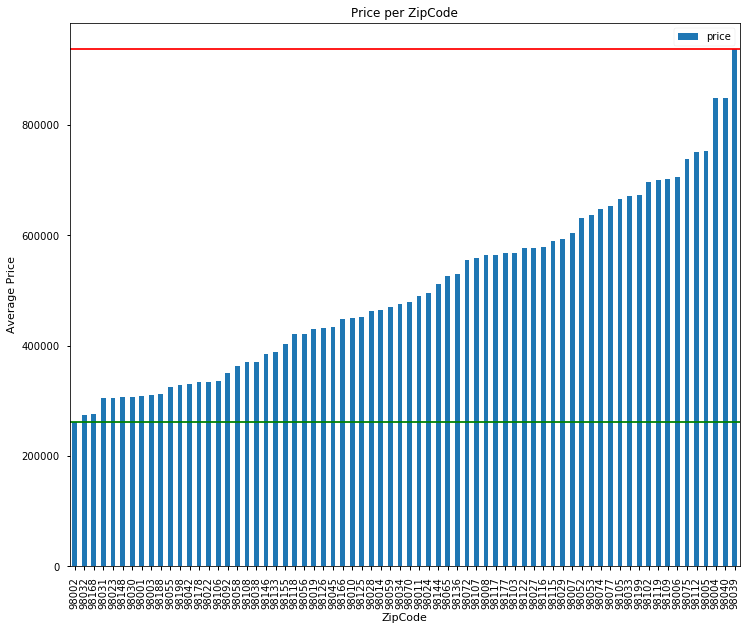

In [111]:
#fig, ax = plt.subplots(figsize=(12, 10))
#ax=sns.barplot(data=zipcode_df,x='zipcode', y='price'),#title='Price per ZipCode')#,\
#              xlabel='ZipCode', ylabel='Average Price')
ax.set_xticklabels(labels=zipcode_df['zipcode'], rotation=90)
zipcode_df.plot.bar(x='zipcode', y='price',title='Price per ZipCode',\
                    xlabel='ZipCode', ylabel='Average Price', figsize=(12, 10))
plt.axhline(y = cheapest, color = 'g', linestyle = '-') 
plt.axhline(y = priciest, color = 'r', linestyle = '-');
#plt.text(1,6 , f"cheapest ~ $ 230 K")#, transform=ax.transAxes)
#plt.text(-.18, .95, f"priciest ~ $ 2 mil")#, transform=ax.transAxes)
#plt.show()

As we can see there is a very considerable difference in average price of the houses in different zipcodes, ranging from about 230 thousand dollars to around 2 millions.

### Seasons <a id='Seas'></a>

Another variable that we can categorize a little bit better is the date.
It is probably hard for the model to categorize based on all the different dates of the sales, but maybe there is a trend there that we can explore.
Therefore I am going to extract from the sale date the month, and categorize the sales based on their month to see if that also has an influence on the price of the houses.

In [112]:
#extracting month from the dates of the sales
months=[]
for i in df['date']:
    dates=datetime.strptime(i, '%m/%d/%Y').date()
    mon=dates.month
    months.append(mon)

In [113]:
#creating a month column
df['months']=months
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno,months
0,10/13/2014,221900.0,3,1.0,1180,5650,1.0,3,7.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10
1,12/9/2014,538000.0,3,2.0,2570,7242,2.0,3,7.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12
3,12/9/2014,604000.0,4,3.0,1960,5000,1.0,5,7.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12
4,2/18/2015,510000.0,3,2.0,1680,8080,1.0,3,8.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2
6,6/27/2014,257500.0,3,2.0,1715,6819,2.0,3,7.0,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.0,1530,1131,3.0,3,8.0,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,5
21593,2/23/2015,400000.0,4,2.0,2310,5813,2.0,3,8.0,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,2
21594,6/23/2014,402101.0,2,1.0,1020,1350,2.0,3,7.0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,6
21595,1/16/2015,400000.0,3,2.0,1600,2388,2.0,3,8.0,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,1


Now we can see the trend of the sales price based on the months of the sale, doing a group by.

In [114]:
months_df=df.groupby('months').mean()
months_df.reset_index(inplace=True)
months_df.sort_values(by='months', ascending=True, inplace=True)
months_df

,months,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,480951.812933,3.406467,2.066975,2035.106236,16949.896074,1.483256,3.360277,7.586605,1765.982679,264.031178,1972.397229,69.905787,98078.146651,47.558411,-122.211739,1945.004619,12403.299076
1,2,477202.199285,3.346738,2.014298,1985.775693,13917.984808,1.473637,3.394996,7.527256,1703.084004,272.825737,1971.956211,50.943396,98077.750670,47.552412,-122.213476,1931.638963,11747.176944
2,3,498740.626045,3.362007,1.982079,1979.032258,14971.445639,1.470131,3.350657,7.535245,1711.171446,262.657706,1971.510753,79.390014,98077.903226,47.557618,-122.211946,1924.937873,12627.742533
3,4,511064.674817,3.352078,2.005868,1989.225428,13378.982885,1.490220,3.358435,7.567237,1719.012714,264.491443,1971.760391,60.572873,98079.883130,47.561858,-122.213558,1946.122249,11860.068460
4,5,498311.252984,3.344353,2.023875,2019.639118,16376.844812,1.486915,3.415978,7.598714,1730.335629,283.723140,1970.822314,92.093333,98079.755739,47.568567,-122.212870,1947.219927,13659.549128
5,6,507974.386018,3.391591,2.077001,2066.659574,14224.773556,1.511905,3.457447,7.675785,1773.238602,287.200101,1971.583080,67.860062,98079.959473,47.569598,-122.210723,1998.560790,12764.941236
6,7,505746.858367,3.394153,2.059476,2081.888609,13798.805948,1.527722,3.442036,7.676915,1810.450101,264.533266,1972.620464,83.609231,98074.833165,47.566412,-122.202419,2004.823589,12437.406754
7,8,491403.859887,3.349718,2.018644,2027.585876,14415.706215,1.497458,3.438418,7.616384,1752.465537,268.402825,1972.293785,74.396135,98077.148588,47.568977,-122.208815,1957.334463,12819.619209
8,9,491742.391010,3.355911,2.056650,2035.057266,15616.770320,1.490764,3.431034,7.600985,1751.751847,276.476601,1971.451970,94.001495,98078.270936,47.565240,-122.210503,1968.642241,11897.786946
9,10,491742.410089,3.351335,2.043917,2028.411276,15309.508605,1.503561,3.405935,7.585757,1741.207122,282.889614,1970.337685,83.437545,98080.284273,47.567743,-122.216466,1956.832641,12927.275371


In [115]:
#Turning the months from numbers into abbreviations on the month names
months_df['months_names'] = months_df['months'].apply(lambda x: calendar.month_abbr[x])

In [116]:
#months_df

In [117]:
#fig, ax = plt.subplots(figsize=(10, 8))
#ax=sns.barplot(data=months_df,x='months', y='price')#,order=months_df.sort_values('months') )
#ax.set_xticklabels(labels=months_df['months'], rotation=90)

#plt.show()

In [118]:
df.reset_index(inplace=True)
df.sort_values(by='months', ascending=True, inplace=True)
#df['months'] = df['months'].apply(lambda x: calendar.month_abbr[x])

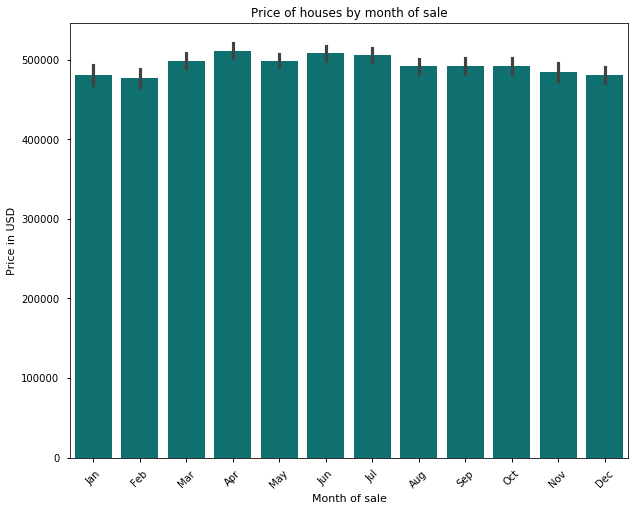

In [119]:
#sns.set_color_codes("pastel")
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df,x='months', y='price', color='teal') #or palette='rocket'
ax.set_xticklabels(labels=months_df['months_names'], rotation=45)
ax.set_title('Price of houses by month of sale')
ax.set_xlabel('Month of sale')
ax.set_ylabel('Price in USD')
plt.show()

As we can see there are some months like January February and December in which the houses tend to sell for less, on average, and other months like April May and June where the average sales are higher.

Now I am going to do a one hot encoding based on the months, since we saw it is a very effective way to include categorical values to the model.

In [120]:
origin_series = pd.Series(df['months'])
cat_origin = origin_series.astype('category')
monthsohe_df=pd.get_dummies(cat_origin)
#months_df.rename(columns={'1': 'January', '2': 'February', '3':'March', '4':'April', '5':'May', '6':'June','7':'July',\
#                       '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}, inplace=True)

Now I can merge the two data frames to run one more linear regression model

In [121]:
# Putting the two dataframes together, so we have normalized, zipcodes and seasons
nzs_df = pd.concat([normzip_df, monthsohe_df], axis=1)
nzs_df.dropna(inplace=True)
nzs_df.head()

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,...,3,4,5,6,7,8,9,10,11,12
0,221900.0,5650.0,3.0,7.0,0.0,1955.0,0.0,47.5112,-122.257,5650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,538000.0,7242.0,3.0,7.0,400.0,1951.0,1991.0,47.7210,-122.319,7639.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,604000.0,5000.0,5.0,7.0,910.0,1965.0,0.0,47.5208,-122.393,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,8080.0,3.0,8.0,0.0,1987.0,0.0,47.6168,-122.045,7503.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,257500.0,6819.0,3.0,7.0,0.0,1995.0,0.0,47.3097,-122.327,6819.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
y=nzs_df['price']
X=nzs_df.drop(['price'], axis=1)

linreg= LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [123]:
R2= metrics.r2_score(y,linreg.predict(X))
print(f"{Fore.BLUE} The R squared value after One-Hot-Encoding the months is {Style.RESET_ALL}", R2.round(5)) 

 The R squared value after One-Hot-Encoding the months is  0.80453


The R squared value decreased a little. So actually encoding this information is not useful for our model, but we will keep in mind our considerations about the months of sale. But will keep pur best performing model, after One Hot Encoding the ZipCode.
Now on this finalized model we are going to perform a cross validation and run more serious statistics.

## Cross Validation

With cross validation a section of the data gets used to train the linear model on, and another section is used to test the model. This is repeated for several times, to reduce the amount of errore due to randomness of the selection of the data.

In [124]:
# So let us define one more time X and y like we did in our last - best performing model
y=normzip_df['price']
X=normzip_df.drop(['price'], axis=1)

results=cross_validate(linreg, X, y, cv=10, return_train_score=True, scoring=["r2", "neg_mean_squared_error"])

This test produces as many results as the splits I specified, which in this case is cv=10. So to get the final result I will calculate the average of the several results.

In [125]:
test_R2=results['test_r2'].mean()
train_R2=results['train_r2'].mean()
test_MSRE=np.sqrt(-results['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results['train_neg_mean_squared_error'].mean())
print(" train MSRE:",train_MSRE, "\n test MSRE:", test_MSRE)
print(" train R2:",train_R2, "\n test R2:", test_R2)

 train MSRE: 90477.4237704816 
 test MSRE: 91539.7559736034
 train R2: 0.8062172460203941 
 test R2: 0.8008242898610437


In [126]:
y=nzs_df['price']
X=nzs_df.drop(['price'], axis=1)

results=cross_validate(linreg, X, y, cv=10, return_train_score=True, scoring=["r2", "neg_mean_squared_error"])

In [127]:
test_R2=results['test_r2'].mean()
train_R2=results['train_r2'].mean()
test_MSRE=np.sqrt(-results['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results['train_neg_mean_squared_error'].mean())
print(" train MSRE:",train_MSRE, "\n test MSRE:", test_MSRE)
print(" train R2:",train_R2, "\n test R2:", test_R2)

 train MSRE: 90768.84416132668 
 test MSRE: 91711.39321330002
 train R2: 0.8047205464274342 
 test R2: 0.8003031289767304


As we can see the MSRE is pretty high, but not too bad considering that the unit is in dollars like price, so it means that when we are trying to make a prediction on price of the house we could be off of about $185200.
On the other hand the R2 results are pretty good and the test performed almost as well as the train, which tells us that we are not overfitting.

To have a concrete proof that all of our work on the data has been useful I am going to run a model with the raw data, just a few one hot encoding to be able to compare the two and see the fruit of our work.

In [128]:
y=ohe_df['price']
X=ohe_df.drop(['price','date',], axis=1)

results_raw=cross_validate(linreg, X, y, cv=10, return_train_score=True, \
                           scoring=["r2", "neg_mean_squared_error"])

In [129]:
test_R2=results_raw['test_r2'].mean()
train_R2=results_raw['train_r2'].mean()
test_MSRE=np.sqrt(-results_raw['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results_raw['train_neg_mean_squared_error'].mean())
print("Raw Data train MSRE :",train_MSRE, "\ntest MSRE:", test_MSRE)
print("Raw Data train R2:",train_R2, "\ntest R2:", test_R2)

Raw Data train MSRE : 118661.73344041024 
test MSRE: 119376.49785175962
Raw Data train R2: 0.6661842185304221 
test R2: 0.660788455949015


With all our manipulations on the data we were able to increase R2 by almost 10%, and brought down the MSRE of about 26 thousand dollars!

### Checking for normality

Next we are going to inspect the residues from our test to check for normality.
<br> We do this with a QQ plot.

In [130]:
y=normzip_df['price']
y=list(y)
X=normzip_df.drop(['price'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

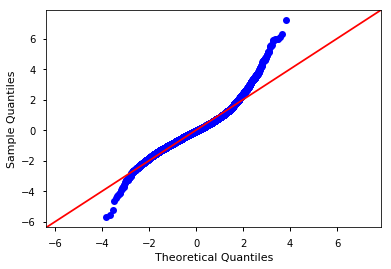

In [131]:
residuals=model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

This QQ plot shows us that our sample has very heavy tails, doesn't fully satisfy the requirement of normality of the data.
But at the same time the central part seems to follow a straight line, there isn't strong evidence to think of a non linear relationship but we will verify that later on.

### Train-Test split instead of Cross Validation

Another way that we can run our model is with a train-test split. It's the same logic as the cross validation but instead of repeating it with different splits I do it only one time.
<br>It is less reliable because doing only one split makes the test more subject to randomness, but there are things that we can study with this setting so we are going to try this type of test as well.

In [132]:
y=normzip_df['price']
X=normzip_df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

In [133]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [134]:
y_hat_train=np.array(y_hat_train)
y_train=np.array(y_train)
y_hat_test=np.array(y_hat_test)
y_test=np.array(y_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [135]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
train_msre=np.sqrt(train_mse)
test_msre=np.sqrt(test_mse)
print('Train Root Mean Squared Error:', train_msre)
print('Test Root Mean Squared Error:', test_msre)

Train Root Mean Squared Error: 91345.31719765035
Test Root Mean Squared Error: 88378.10912550481


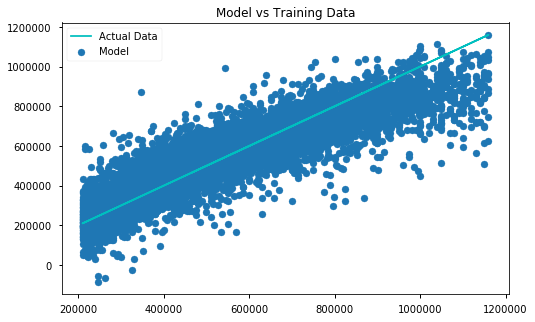

In [136]:
# Create a matplotlib plot for Model vs Training Data
plt.figure(figsize=(8, 5))
# Create a scatterplot on the figure of y-train
plt.scatter(y_train, y_hat_train, label='Model')
# Plot y_hat_train
plt.plot(y_train, y_train, label='Actual Data', color='c')
plt.title('Model vs Training Data')
plt.legend();

This graph gives us a sense of what is the spread of the points predicted by my model compared to the actual data. The vertical distance between the points and the line denote the errors.
Another way to get a better sense of our error is to calculate for our model the bias and variance which we will do next.
<br>But first I will make the same plot for the test data vs the model.

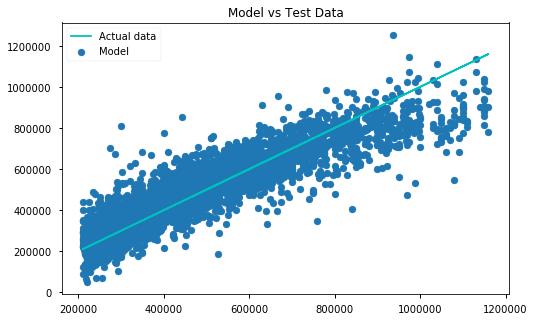

In [137]:
# Create a matplotlib figure for Model vs Test Data
plt.figure(figsize=(8, 5))
# Create a scatter plot
plt.scatter(y_test, y_hat_test, label='Model')
plt.plot(y_train, y_train, label='Actual data', color='c')
plt.title('Model vs Test Data')
plt.legend();

In both cases it seems that most of the model data are pretty close to the actual data.

### Bias and Variance:

We can decompose the mean squared error as the sum of bias, variance and irreducible error.
Bias tells us how off we are from the 'real value' that the model should predict. When we are trying to predict the price of a house, this is the amount by which we could be wrong, in either direction, overestimating or underestimating.
Variance indicates the fluctuations that the model has based on the different data of the sample.
When we are adding more factors to our analysis, like we did with polynomial features, we get a more precise model that fits better the date but we increase the variance.
Irreducible error is the amount of error that is due to background noise and is impossible to remove.

In [138]:
def bias(y, y_hat):
    bias=np.mean(y_hat-y)
    return bias
def variance(y_hat):
    var=np.mean([ys**2 for ys in y_hat])-((np.mean(y_hat))**2)
    return var

In [139]:
# Bias and variance for training set 
b = bias(y_train, y_hat_train)
v = variance(y_hat_train)
print('Train bias: {} \nTrain variance: {}'.format(b, v))

Train bias: -5.779118756482895e-09 
Train variance: 34291595255.350555


In [140]:
# Bias and variance for test set 
b = bias(y_test, y_hat_test)
v = variance(y_hat_test)
print('Test bias: {} \nTest variance: {}'.format(b, v))


Test bias: 2658.6504368309465 
Test variance: 33384895079.885193


Our bias is not bad at all, but as we mentioned this is because the model is very precise which gets reflected in the variance which instead is ver high.
We can tune the model to try to decrease the variance by changing or dropping some parameters, but that will happen at the expense of the bias which will increase.

# Polynomial Regression <a id='Poly'></a>

## Third order Polynomial regression

Another thing that we can do to improve our model to fit our data is to include higher degree terms, using a polynomial fit. This includes products between the different independent variables, including higher powers of the single variables, up until a power that I can set.


In [141]:
df.isna().sum()

index               0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3455
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
reno                0
months              0
dtype: int64

In [142]:
pf = PolynomialFeatures(degree=3) # degree is the highest exponent in the poly

y=df['price']
X=df.drop(['index','price', 'date', 'yr_renovated'], axis=1)

# Fitting the PolynomialFeatures object
pf.fit(X)

PolynomialFeatures(degree=3)

In [143]:
df

,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno,months
18412,20421,1/6/2015,344000.0,3,2.0,1250,1033,3.0,3,8.0,...,0.0,2007,0.0,98103,47.6907,-122.343,1250,1150,0,1
2568,2842,1/28/2015,282000.0,3,1.0,1670,5200,1.0,5,7.0,...,640.0,1977,0.0,98042,47.3659,-122.092,1620,6696,0,1
5792,6406,1/26/2015,750000.0,5,4.0,3500,101494,1.5,3,8.0,...,0.0,1967,1990.0,98053,47.6745,-122.054,3250,38636,1,1
7775,8618,1/14/2015,665000.0,3,2.0,2700,5040,1.0,3,8.0,...,1140.0,1947,0.0,98144,47.5834,-122.290,3010,5000,0,1
4724,5239,1/16/2015,370000.0,3,2.0,1770,7667,1.0,3,8.0,...,500.0,1966,0.0,98177,47.7724,-122.362,2180,8103,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,6917,12/3/2014,315000.0,3,2.0,1900,7076,1.0,3,7.0,...,770.0,1977,0.0,98155,47.7569,-122.326,1540,10113,0,12
6277,6942,12/15/2014,319990.0,4,2.0,2120,5293,2.0,3,7.0,...,0.0,2003,NaN,98031,47.4217,-122.201,1990,5313,1,12
6299,6968,12/11/2014,275000.0,3,2.0,1620,6415,2.0,4,7.0,...,0.0,1989,0.0,98038,47.3577,-122.038,1640,7253,0,12
6140,6794,12/8/2014,645000.0,3,2.0,2930,19900,1.5,3,9.0,...,0.0,1983,0.0,98077,47.7234,-122.066,3160,20492,0,12


In [144]:
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())
pdf

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x14^3,x14^2 x15,x14^2 x16,x14 x15^2,x14 x15 x16,x14 x16^2,x15^3,x15^2 x16,x15 x16^2,x16^3
0,1.0,3.0,2.0,1250.0,1033.0,3.0,3.0,8.0,1250.0,0.0,...,1.520875e+09,0.000000e+00,1.322500e+06,0.0,0.0,1150.0,0.0,0.0,0.0,1.0
1,1.0,3.0,1.0,1670.0,5200.0,1.0,5.0,7.0,1030.0,640.0,...,3.002246e+11,0.000000e+00,4.483642e+07,0.0,0.0,6696.0,0.0,0.0,0.0,1.0
2,1.0,5.0,4.0,3500.0,101494.0,1.5,3.0,8.0,3500.0,0.0,...,5.767352e+13,1.492740e+09,1.492740e+09,38636.0,38636.0,38636.0,1.0,1.0,1.0,1.0
3,1.0,3.0,2.0,2700.0,5040.0,1.0,3.0,8.0,1560.0,1140.0,...,1.250000e+11,0.000000e+00,2.500000e+07,0.0,0.0,5000.0,0.0,0.0,0.0,1.0
4,1.0,3.0,2.0,1770.0,7667.0,1.0,3.0,8.0,1270.0,500.0,...,5.320317e+11,0.000000e+00,6.565861e+07,0.0,0.0,8103.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19507,1.0,3.0,2.0,1900.0,7076.0,1.0,3.0,7.0,1130.0,770.0,...,1.034285e+12,0.000000e+00,1.227273e+09,0.0,0.0,1456272.0,0.0,0.0,0.0,1728.0
19508,1.0,4.0,2.0,2120.0,5293.0,2.0,3.0,7.0,2120.0,0.0,...,1.499752e+11,2.822797e+07,3.387356e+08,5313.0,63756.0,765072.0,1.0,12.0,144.0,1728.0
19509,1.0,3.0,2.0,1620.0,6415.0,2.0,4.0,7.0,1620.0,0.0,...,3.815514e+11,0.000000e+00,6.312721e+08,0.0,0.0,1044432.0,0.0,0.0,0.0,1728.0
19510,1.0,3.0,2.0,2930.0,19900.0,1.5,3.0,9.0,2930.0,0.0,...,8.605043e+12,0.000000e+00,5.039065e+09,0.0,0.0,2950848.0,0.0,0.0,0.0,1728.0


Now fitting the linear regression model:

In [145]:
lr = LinearRegression()

lr.fit(pdf, y)

LinearRegression()

In [146]:
lr.score(pdf, y) 

0.7642137995121101

This is a pretty good R squared, but what usually happens with the polynomial regression is that we are fitting the model on the train set so well, that we are actually overfitting and it will perform very poorly on the test set, because we are picking up not only the actual real trends of the relationship between the variables, but also some random noise, given by the random data.
Let us see this in practice.

Train test split with poly to show the overfitting.

In [147]:
X_train, X_test, y_train, y_test = train_test_split(pdf, y,
                                                    test_size=0.2,
                                                    random_state=42)
lr_poly = LinearRegression()

# Always fit on the training set
lr_poly.fit(X_train, y_train)

train_R=lr_poly.score(X_train, y_train)
print("Train R squared:", train_R)

Train R squared: 0.7211632104593759


In [148]:
test_R=lr_poly.score(X_test, y_test)
print("Test R squared:", test_R)

Test R squared: -0.9352133941119369


The fact that R squared on the test is so bad shows us that we fitted very well the train, in fact too well picking up random noise. This model is not good becayse even if it can explain very well the train it cannot generalize to a randomly chosen test set.

## Second Order Polynomial
What is usually recommended in this situation is to lower the order of the polynomial, which will reduce the number of variables, and overall give us a more simple curve for our model.
Let's see what R squared will look like and if we can avoid the overfitting with a second degree polynomial.

In [149]:
pf = PolynomialFeatures(degree=2) # degree is the highest exponent in the poly
#interaction_only: defalut false, if true I wont get a^2 and b^2 but only ab
y=df['price']
X=df.drop(['price', 'date','yr_renovated' ], axis=1)

# Fitting the PolynomialFeatures object
pf.fit(X)

PolynomialFeatures()

In [150]:
pdf2 = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())
pdf2

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x14^2,x14 x15,x14 x16,x14 x17,x15^2,x15 x16,x15 x17,x16^2,x16 x17,x17^2
0,1.0,20421.0,3.0,2.0,1250.0,1033.0,3.0,3.0,8.0,1250.0,...,1562500.0,1437500.0,0.0,1250.0,1.322500e+06,0.0,1150.0,0.0,0.0,1.0
1,1.0,2842.0,3.0,1.0,1670.0,5200.0,1.0,5.0,7.0,1030.0,...,2624400.0,10847520.0,0.0,1620.0,4.483642e+07,0.0,6696.0,0.0,0.0,1.0
2,1.0,6406.0,5.0,4.0,3500.0,101494.0,1.5,3.0,8.0,3500.0,...,10562500.0,125567000.0,3250.0,3250.0,1.492740e+09,38636.0,38636.0,1.0,1.0,1.0
3,1.0,8618.0,3.0,2.0,2700.0,5040.0,1.0,3.0,8.0,1560.0,...,9060100.0,15050000.0,0.0,3010.0,2.500000e+07,0.0,5000.0,0.0,0.0,1.0
4,1.0,5239.0,3.0,2.0,1770.0,7667.0,1.0,3.0,8.0,1270.0,...,4752400.0,17664540.0,0.0,2180.0,6.565861e+07,0.0,8103.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19507,1.0,6917.0,3.0,2.0,1900.0,7076.0,1.0,3.0,7.0,1130.0,...,2371600.0,15574020.0,0.0,18480.0,1.022728e+08,0.0,121356.0,0.0,0.0,144.0
19508,1.0,6942.0,4.0,2.0,2120.0,5293.0,2.0,3.0,7.0,2120.0,...,3960100.0,10572870.0,1990.0,23880.0,2.822797e+07,5313.0,63756.0,1.0,12.0,144.0
19509,1.0,6968.0,3.0,2.0,1620.0,6415.0,2.0,4.0,7.0,1620.0,...,2689600.0,11894920.0,0.0,19680.0,5.260601e+07,0.0,87036.0,0.0,0.0,144.0
19510,1.0,6794.0,3.0,2.0,2930.0,19900.0,1.5,3.0,9.0,2930.0,...,9985600.0,64754720.0,0.0,37920.0,4.199221e+08,0.0,245904.0,0.0,0.0,144.0


In [151]:
X_train, X_test, y_train, y_test = train_test_split(pdf2, y,
                                                    test_size=0.2,
                                                    random_state=19)
lr_poly = LinearRegression()

# Always fit on the training set
lr_poly.fit(X_train, y_train)

R2_train=lr_poly.score(X_train, y_train)
R2_test=lr_poly.score(X_test, y_test)

In [152]:
y_hat_train = lr_poly.predict(X_train)
y_hat_test = lr_poly.predict(X_test)

In [153]:
y_hat_train=np.array(y_hat_train)
y_train=np.array(y_train)
y_hat_test=np.array(y_hat_test)
y_test=np.array(y_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [154]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
train_msre=np.sqrt(train_mse)
test_msre=np.sqrt(test_mse)
print('Train Root Mean Squared Error:', train_msre)
print('Test Root Mean Squared Error:', test_msre)
print("Train R2:",R2_train, "\nTest R2:", R2_test)

Train Root Mean Squared Error: 103241.77208785225
Test Root Mean Squared Error: 106069.05461070842
Train R2: 0.7496610927470541 
Test R2: 0.7226804775485179


This is a pretty good result with polynomial fit, it doesn't give us the usual overfitting, but the R squared it produces is not really high, it is not giving us anything more than what we got with One Hot Encoding.
But there is something else that we can do, for which the Polynomial regression can help us.

## Using Polynomial factors to choose new variables

Usually one thing that is suggested to improve the model is trying to come up with new variables that can increase the correlations, by multiplying some of the independent variables we have.
<br>But it is not necessary to try to multiply them at random, and the polinomial regression even though it usually leads to overfitting, in this case can be very useful.
<br>We are going to run again the model with the polynomial regression, and we are going to look at the factors that performed best (since the polynomial features contain also all the possible interactions between the variables, up until the power that we selected).
<br>Then we are going to take only the terms that performed best, that have a higher coefficient, and make a model again fitting with just those, adding them to our best perfmorming model so far.

In [155]:
pf = PolynomialFeatures(degree=3) # degree is the highest exponent in the poly

y=df['price']
X=df.drop(['index','price', 'date', 'yr_renovated'], axis=1)

# Fitting the PolynomialFeatures object
pf.fit(X)

PolynomialFeatures(degree=3)

In [156]:
y=df['price']
y = list(y)

model = sm.OLS(y, pdf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     143.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:45:01   Log-Likelihood:            -2.5230e+05
No. Observations:               19512   AIC:                         5.055e+05
Df Residuals:                   19082   BIC:                         5.088e+05
Df Model:                         429                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
1               0.0038      0.007      0.567      0.571      -0.009       0.017
x0              2.2446      0.233      9.653      0.000       1.789       2.700
x1              3.4482      0.358      9.640      0.000       2.747       4.149
x2              1.4445      0.148      9.743      0.000       1.154       1.735
x3              1.5018      0.154      9.778      0.000       1.201       1.803
x4              1.4933      0.154      9.723      0.000       1.192       1.794
x5              0.1111      0.013      8.809      0.000       0.086       0.136
x6             -0.2181      0.022     -9.867      0.000      -0.261      -0.175
x7             -0.0258      0.004     -6.432      0.000      -0.034      -0.018
x8              0.0620      0.007      9.176      0.000       0.049       0.075
x9             -0.3649      0.037     -9.733      0.000      -0.438      -0.291
x10             0.0188      0.002      9.235      0.000       0.015       0.023
x11            -0.0572      0.006     -9.769      0.000      -0.069      -0.046
x12            -0.0685      0.007     -9.781      0.000      -0.082      -0.055
x13            -0.0528      0.005     -9.726      0.000      -0.063      -0.042
x14            -0.0193      0.002     -9.933      0.000      -0.023      -0.015
x15             0.0309      0.003      9.786      0.000       0.025       0.037
x16             0.0003      0.000      1.381      0.167      -0.000       0.001
x0^2            0.0056      0.001      9.475      0.000       0.004       0.007
x0 x1          -0.0052      0.001     -9.290      0.000      -0.006      -0.004
x0 x2           1.1884      0.119      9.955      0.000       0.954       1.422
x0 x3           6.6349      0.705      9.410      0.000       5.253       8.017
x0 x4           0.0180      0.002      9.786      0.000       0.014       0.022
x0 x5          -0.0091      0.001     -9.535      0.000      -0.011      -0.007
x0 x6           0.0013      0.000      8.895      0.000       0.001       0.002
x0 x7           0.9586      0.097      9.848      0.000       0.768       1.149
x0 x8           0.2476      0.024     10.208      0.000       0.200       0.295
x0 x9           1.0923      0.112      9.761      0.000       0.873       1.312
x0 x10         54.7599      5.612      9.757      0.000      43.759      65.761
x0 x11          0.0302      0.003      9.748      0.000       0.024       0.036
x0 x12         -0.0677      0.007     -9.737      0.000      -0.081      -0.054
x0 x13          1.0935      0.111      9.815      0.000       0.875       1.312
x0 x14          5.7260      0.599      9.556      0.000       4.552       6.901
x0 x15         -0.0007   7.93e-05     -8.962      0.000      -0.001      -0.001
x0 x16          0.0035      0.000      8.269      0.000       0.003       0.004
x1^2            0.0004   5.45e-05      7.53

In [157]:
coefficients=model.params
sort_coef=coefficients.sort_values(ascending=False)
sort_coef[0:10]

x4^2 x13      73.540660
x0 x10        54.759949
x5 x10        35.277357
x0 x8 x11     32.656419
x9^2 x11      30.144871
x0 x2 x11     29.630973
x2 x5 x11     27.783154
x4 x8 x15     27.524400
x5 x11 x13    26.684404
x1 x4 x13     22.525519
dtype: float64

We need to do a little interpretation here, looking at the name of the columns.
Let us quickly create a dataframe to help us read into the x values

In [158]:
cols=df.drop(['index','price', 'date', ], axis=1).columns
xlist=['x%d' % i for i in range(0, 18, 1)]
interp=pd.DataFrame(data=zip(cols,xlist),columns=['coe','xvalues'])
interp

,coe,xvalues
0,bedrooms,x0
1,bathrooms,x1
2,sqft_living,x2
3,sqft_lot,x3
4,floors,x4
5,condition,x5
6,grade,x6
7,sqft_above,x7
8,sqft_basement,x8
9,yr_built,x9


Perfect, with this we can interpret what are the top 5 coefficients that have the most influence on the price of the houses and include them in our model.

In [159]:
best_coefficients=['floors^2*long','bdrms*yr_reno','condition*yr_renovated', 'bdrms*sqft_basement*zipcode',\
                   'yr_built^2*zipcode']

In [160]:
#best_coefficients=['bedrms*zip','flrs^2*sqft_lv15','condition*zip', 'yr_built^2*lat',\
#                   'bedrms*sqftbsmt*months']

A quick note: these coefficients don't need to make sense from a logical point of view, so we are transitioning from inferential statistic to predictive modeling where we our top priority is not understanding the parameters that determin a change in our target and describe the relationship best, but to have a model that can work as well as possible in predicting the price of a house, even if not all the coefficients are logical.
<br>Now let us create new columns with these features, and we will add them to the DataFrame and run the cross validation model again.

In [161]:
df_newfeatures=pd.DataFrame()

In [162]:
df_newfeatures['floors^2*long']=(df['floors']**2)*df['long']
df_newfeatures['bdrms*yr_reno']=(df['bedrooms'])*df['yr_renovated']
df_newfeatures['condition*yr_renovated']=df['condition']*df['yr_renovated']
df_newfeatures['bdrms*sqft_basement*zipcode']=df['bedrooms']*df['sqft_basement']*df['zipcode']
df_newfeatures['yr_built^2*zipcode']=(df['yr_built']**2)*df['zipcode']

In [163]:
#df_newfeatures['bedrms*zip']=df['bedrooms']*df['zipcode']
#df_newfeatures['flrs^2*sqft_lv15']=(df['floors']**2)*df['sqft_living15']
#df_newfeatures['condition*zip']=df['condition']*df['zipcode']
#df_newfeatures['yr_built^2*lat']=(df['yr_built']**2)*df['lat']
#df_newfeatures['bedrms*sqftbsmt*months']=df['bedrooms']*df['sqft_basement']*df['months']

In [164]:
nz_nf_df=pd.concat([normzip_df,df_newfeatures], axis=1)
nz_nf_df.dropna(inplace=True)

In [165]:
nz_nf_df

,price,sqft_lot,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,floors^2*long,bdrms*yr_reno,condition*yr_renovated,bdrms*sqft_basement*zipcode,yr_built^2*zipcode
0,221900.0,5650.0,3.0,7.0,0.0,1955.0,0.0,47.5112,-122.257,5650.0,...,0.0,1.0,0.0,0.0,0.0,-122.257,0.0,0.0,0.0,3.752388e+11
1,538000.0,7242.0,3.0,7.0,400.0,1951.0,1991.0,47.7210,-122.319,7639.0,...,0.0,0.0,0.0,0.0,0.0,-489.276,5973.0,5973.0,117750000.0,3.735031e+11
3,604000.0,5000.0,5.0,7.0,910.0,1965.0,0.0,47.5208,-122.393,5000.0,...,0.0,0.0,0.0,0.0,0.0,-122.045,0.0,0.0,0.0,3.872127e+11
4,510000.0,8080.0,3.0,8.0,0.0,1987.0,0.0,47.6168,-122.045,7503.0,...,0.0,0.0,0.0,0.0,0.0,-489.308,0.0,0.0,0.0,3.900544e+11
6,257500.0,6819.0,3.0,7.0,0.0,1995.0,0.0,47.3097,-122.327,6819.0,...,0.0,0.0,0.0,0.0,0.0,-122.337,0.0,0.0,214939740.0,3.770377e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19505,425000.0,9680.0,4.0,7.0,0.0,1956.0,0.0,47.6340,-122.125,10050.0,...,0.0,0.0,0.0,0.0,0.0,-489.592,0.0,0.0,357215040.0,3.960848e+11
19506,268000.0,7510.0,5.0,8.0,0.0,1988.0,2013.0,47.2595,-122.218,7957.0,...,0.0,0.0,0.0,0.0,0.0,-489.636,0.0,0.0,38265240.0,3.956100e+11
19509,500000.0,7806.0,4.0,6.0,350.0,1949.0,0.0,47.6859,-122.166,9920.0,...,0.0,0.0,0.0,0.0,0.0,-489.196,0.0,0.0,0.0,3.961171e+11
19510,1010000.0,5400.0,5.0,8.0,1000.0,1910.0,0.0,47.6366,-122.369,2008.0,...,0.0,0.0,0.0,0.0,0.0,-488.276,0.0,0.0,0.0,3.936780e+11


Let us try again to run our cross validation

In [166]:
y=nz_nf_df['price']
X=nz_nf_df.drop(['price'], axis=1)

results=cross_validate(linreg,X, y, cv=10, return_train_score=True, \
                       scoring=["r2", "neg_mean_squared_error"])

In [167]:
test_R2=results['test_r2'].mean()
train_R2=results['train_r2'].mean()
test_MSRE=np.sqrt(-results['test_neg_mean_squared_error'].mean())
train_MSRE=np.sqrt(-results['train_neg_mean_squared_error'].mean())
print(" train MSRE:",train_MSRE, "\n test MSRE:", train_MSRE)
print(" train R2:",train_R2, "\n test R2:", test_R2)

 train MSRE: 90466.76806263774 
 test MSRE: 90466.76806263774
 train R2: 0.8049255714067856 
 test R2: 0.7999172610649521


We can see how in this way including only some of the terms generated by the polynomial fit, we still get a high R squared for the train set but we don't get the very low result for the test, R squared is high ALSO for the test which shows that we are not overfitting in this way.

Ultimately what we tried as a new technique helped improving the fit, generating new features instead of trying randomly some products of variables, using the poly fit to our aid, but avoiding its usual issue of overfitting.

### try to use 10 new features. Modify it if you have time

In [168]:
#best10_coeff=['bedrms*zip','flrs^2*sqft_lv15','condition*zip', 'yr_built^2*lat',\
#        'bedrms*sqftbsmt*months','bedrooms*sqft_above*months','bathrooms*lat*sqft_living15',\
#        'bedrooms*lat*sqft_living15','sqft_living*floors*long','bedrooms*sqft_living*long']

In [169]:
#df_10=pd.DataFrame()
#df_10['bedrooms*sqft_above*months']=df['bedrooms']*df['sqft_above']*df['months']
#df_10['bathrooms*lat*sqft_living15']=df['bathrooms']*df['lat']*df['sqft_living15']
#df_10['bedrooms*lat*sqft_living15']=df['bedrooms']*df['lat']*df['sqft_living15']
#df_10['sqft_living*floors*long']=df['sqft_living']*df['floors']*df['long']
#df_10['bedrooms*sqft_living*long']=df['bedrooms']*df['sqft_living']*df['long']

In [170]:
#nzs_10_df=pd.concat([nzs_nf_df,df_10], axis=1)
#nzs_10_df.dropna(inplace=True)

In [171]:
#y=nzs_10_df['price']
#X=nzs_10_df.drop(['price'], axis=1)

#results=cross_validate(linreg,X, y, cv=10, return_train_score=True, \
#                       scoring=["r2", "neg_mean_squared_error"])

In [172]:
#test_R2=results['test_r2'].mean()
#train_R2=results['train_r2'].mean()
#test_MSRE=np.sqrt(-results['test_neg_mean_squared_error'].mean())
#train_MSRE=np.sqrt(-results['train_neg_mean_squared_error'].mean())
#print(" train MSRE:",train_MSRE, "\n test MSRE:", test_MSRE)
#print(" train R2:",train_R2, "\n test R2:", test_R2)

In [173]:
#Another good result. 
#<br>The train R2 increased but also the test R2 increased, we are close to the threshold of overfitting but not there yet.
#<br>MSRE of the train decreased but the test one increased.
#<br>One more thing we can do to avoid overfitting with the polynomials is to decrease the degree of the Polynomial fit, which means reducing the number of terms in the equation, reducing the amount of noise.

## Predictions on price of the house

With this in depth analysis we were able to create different models, with polynomials and not, that interepret well the results of our data set, with an R squared as high as 80%.
Plugging into these models the information we have from a user about the area where they would like to buy a house, number of bedrooms bathrooms and floors, we should be able to predict the expected price of the house with an error of roughly 90K.
The features that we saw influence more heavily the price are: the area (in terms of zipcode), whether the house was renovated or not,  the number of bathrooms, the sqft living area and the time of the year in which the house was sold.
With these conclusions in mind let us see what concrete recommendations we can give to our users to be able to make the best choice for their dream home, in relation to their budget.

# Recommendations:
Given everything that we have seen in this study, there are some concrete business recommendations that we can give to the users of "Don't Roam Buy a Home",to make the best educated choice in purchasing their home:
* Scout the areas which have houses in your same price range. Depending on the zipcode the average price can go from 260 thousand dollars to almost a million.
* Save some of your budget for renovations. In particular we recommend buying a house in worse condition but with more squarefootage and then improving it - renovations turned out to be a very important factor in the price of a house, and while adding a bathroom can cost as little as 2500 dollars (__[link](https://homeguide.com/costs/cost-to-add-a-bathroom)__) buying a house with an extra bathroom will increase your price by roughly 50K.
* Try to buy during low season, months like December January and February have the lowest average price sales, while in the spring and summer houses tend to sell for more.

### Future Steps
One factor that turned out to be crucial is the renovations on the house. We could gather more data about that and offer better advice in terms of how much money to keep aside for renovations and what are the type of improvements that would be most beneficial, both for the user and in terms of increasing the value of the house (in the event of wanting to resell it).
<br>
<br>
We could also do a more in depth study about the areas even within the zipcode, to do even more targeted statistics and be able to provide an even more recommendation in terms of where to look for a house.
<br>
<br>
With the information we found, we could create and algorythm that takes into account not only the desired house features, but also the user's monthly salary and available cash for down payment.
Inputing also the current interest rate and the usual taxes for their state we can determine what would be the closing costs, the monthly mortgage for the user and therefore the possible range of prices of houses that they can afford.
If they can't afford the house that they like, we could still help them out.
Considering that every month that passes, the user can save up the money that would have gone toward the mortgae to build their savings instead, we can also recommend the user to wait and purchase a house with a bigger down payment (hoping for not too high fluctuations of the market) and in how many months they could afford that house.